# TCS_Stock_Analysis

In [12]:
!pip install nsepy

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nsepy as nse
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
from datetime import date
import datetime
current_time=datetime.datetime.now()

In [59]:
tcs=nse.get_history(symbol='TCS',start=date(2010,1,1),end=date(current_time.year,current_time.month,current_time.day))

In [60]:
tcs.head()

Symbol Series  Prev Close    Open    High     Low    Last   Close  \
Date                                                                           
2010-01-04    TCS     EQ      750.25  754.80  758.90  749.05  752.25  751.65   
2010-01-05    TCS     EQ      751.65  755.00  759.55  746.55  748.70  751.85   
2010-01-06    TCS     EQ      751.85  751.85  752.20  733.00  737.00  734.85   
2010-01-07    TCS     EQ      734.85  735.50  739.40  711.00  711.85  714.40   
2010-01-08    TCS     EQ      714.40  716.00  718.50  696.50  696.50  699.80   

              VWAP   Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                    
2010-01-04  753.34   981841  7.396555e+13     NaN              570284   
2010-01-05  751.53  1007244  7.569694e+13     NaN              513287   
2010-01-06  738.35  1674588  1.236424e+14     NaN             1010023   
2010-01-07  717.63  3237446  2.323275e+14     NaN             1987073   
2010-01-08  704.68  3024089  2.131008e+14     NaN             1944945   

            %Deliverble  
Date                     
2010-01-04       0.5808  
2010-01-05       0.5096  
2010-01-06       0.6031  
2010-01-07       0.6138  
2010-01-08       0.6432

In [61]:
tcs.shape

(3273, 14)

In [62]:
tcs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3273 entries, 2010-01-04 to 2023-03-03
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3273 non-null   object 
 1   Series              3273 non-null   object 
 2   Prev Close          3273 non-null   float64
 3   Open                3273 non-null   float64
 4   High                3273 non-null   float64
 5   Low                 3273 non-null   float64
 6   Last                3273 non-null   float64
 7   Close               3273 non-null   float64
 8   VWAP                3273 non-null   float64
 9   Volume              3273 non-null   int64  
 10  Turnover            3273 non-null   float64
 11  Trades              2918 non-null   float64
 12  Deliverable Volume  3273 non-null   int64  
 13  %Deliverble         3273 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 383.6+ KB


In [63]:
tcs.describe()

Prev Close         Open         High          Low         Last  \
count  3273.000000  3273.000000  3273.000000  3273.000000  3273.000000   
mean   2185.445020  2186.896471  2209.743309  2162.831088  2186.335457   
std     795.136487   795.505569   801.481120   788.770409   795.104477   
min     699.550000   704.000000   714.000000   685.250000   696.500000   
25%    1467.800000  1461.100000  1478.500000  1450.000000  1469.050000   
50%    2242.150000  2244.000000  2263.950000  2215.500000  2241.500000   
75%    2624.000000  2623.100000  2649.950000  2599.050000  2623.050000   
max    4019.150000  4033.950000  4043.000000  3980.000000  4025.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  3273.000000  3273.000000  3.273000e+03  3.273000e+03    2918.000000   
mean   2186.244042  2186.430196  1.941009e+06  4.385664e+14   93898.739890   
std     794.989434   795.122817  1.669290e+06  4.580598e+14   61620.253645   
min     699.550000   704.680000  2.801700e+04  3.989508e+12    1219.000000   
25%    1468.100000  1464.410000  9.805690e+05  1.746969e+14   50105.250000   
50%    2242.300000  2241.630000  1.526692e+06  2.992303e+14   78954.000000   
75%    2624.550000  2625.050000  2.410476e+06  5.770467e+14  121664.500000   
max    4019.150000  4010.330000  4.403358e+07  1.268362e+16  704881.000000   

       Deliverable Volume  %Deliverble  
count        3.273000e+03  3273.000000  
mean         1.067591e+06     0.577090  
std          8.944759e+05     0.120818  
min          7.765000e+03     0.121400  
25%          5.810660e+05     0.499000  
50%          8.867270e+05     0.583700  
75%          1.335928e+06     0.663500  
max          3.155626e+07     0.899300

In [64]:
tcs.isnull().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                355
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [65]:
tcs['Trades'].fillna(tcs['Trades'].mean(),inplace=True)

In [66]:
tcs.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [67]:
tcs.duplicated().sum()

3

In [68]:
tcs.drop_duplicates(inplace=True)

In [69]:
tcs.duplicated().sum()

0

In [70]:
#since 'Symbol' and 'Series' is constant value we can drop it
tcs.drop(['Symbol','Series'],axis=1,inplace=True)

In [71]:
tcs.head()

Prev Close    Open    High     Low    Last   Close    VWAP  \
Date                                                                     
2010-01-04      750.25  754.80  758.90  749.05  752.25  751.65  753.34   
2010-01-05      751.65  755.00  759.55  746.55  748.70  751.85  751.53   
2010-01-06      751.85  751.85  752.20  733.00  737.00  734.85  738.35   
2010-01-07      734.85  735.50  739.40  711.00  711.85  714.40  717.63   
2010-01-08      714.40  716.00  718.50  696.50  696.50  699.80  704.68   

             Volume      Turnover       Trades  Deliverable Volume  \
Date                                                                 
2010-01-04   981841  7.396555e+13  93898.73989              570284   
2010-01-05  1007244  7.569694e+13  93898.73989              513287   
2010-01-06  1674588  1.236424e+14  93898.73989             1010023   
2010-01-07  3237446  2.323275e+14  93898.73989             1987073   
2010-01-08  3024089  2.131008e+14  93898.73989             1944945   

            %Deliverble  
Date                     
2010-01-04       0.5808  
2010-01-05       0.5096  
2010-01-06       0.6031  
2010-01-07       0.6138  
2010-01-08       0.6432

# EDA

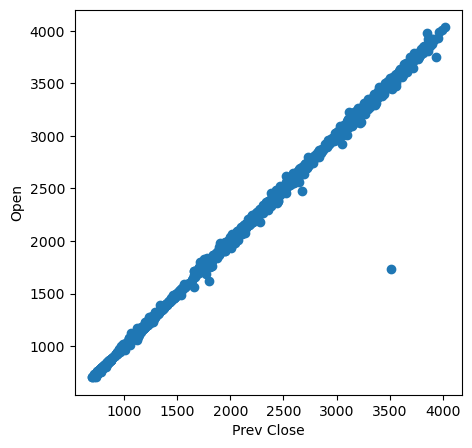

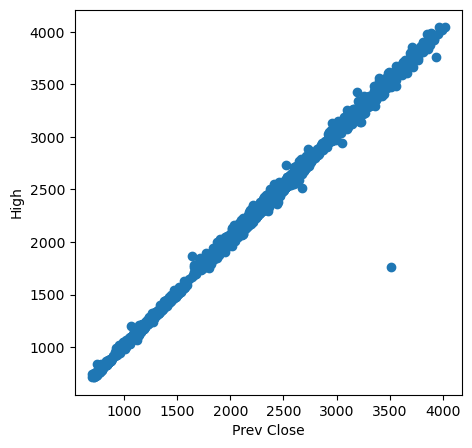

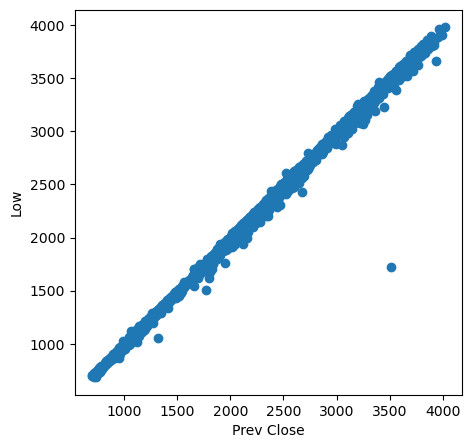

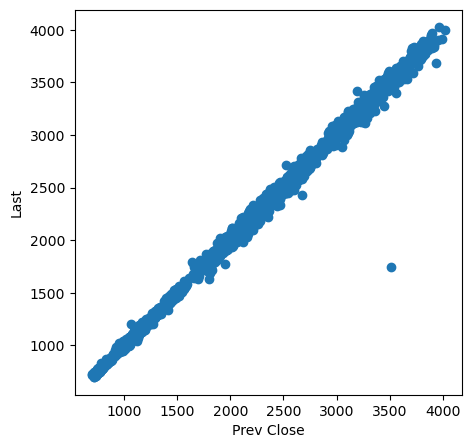

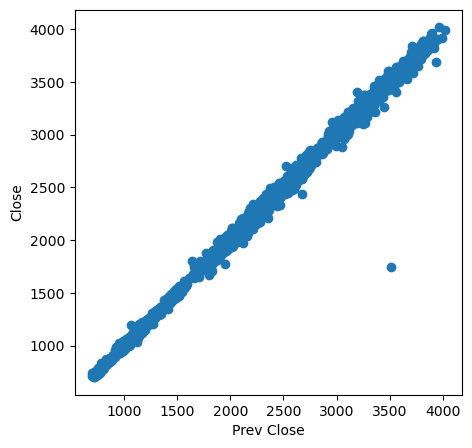

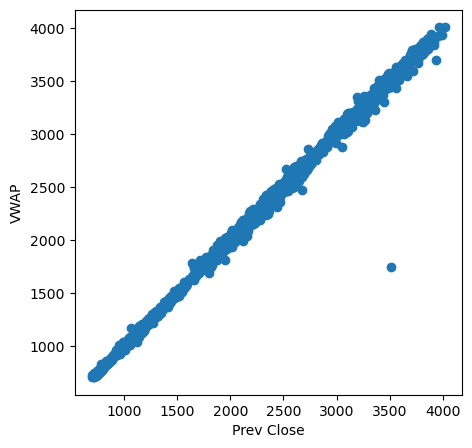

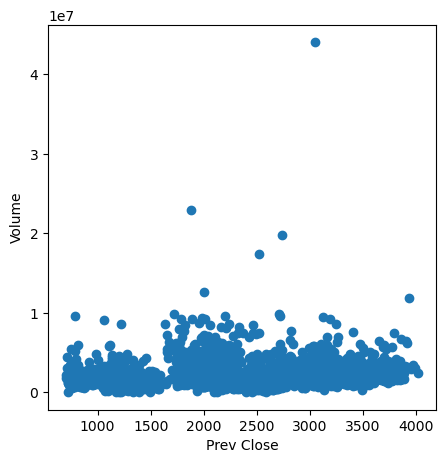

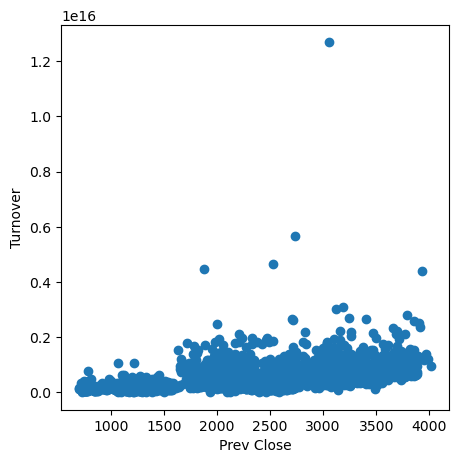

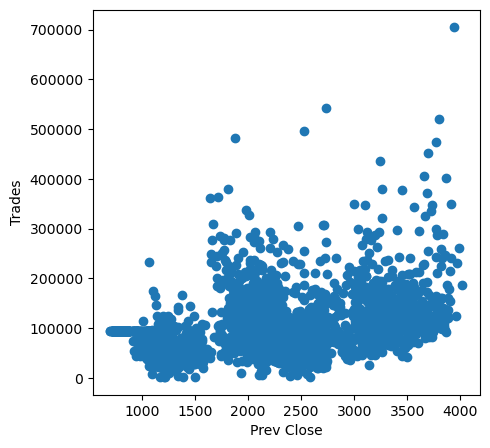

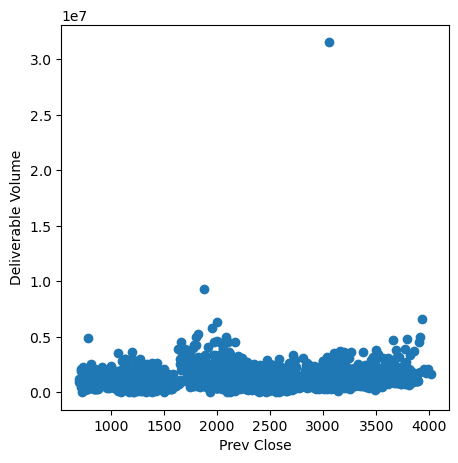

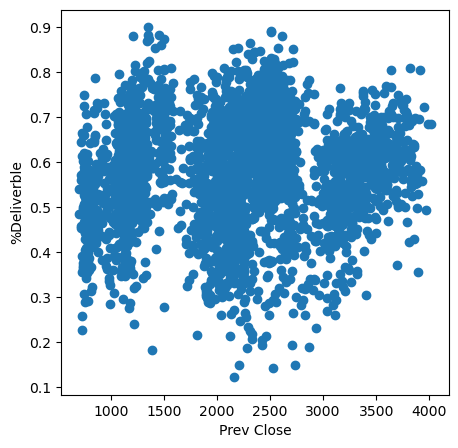

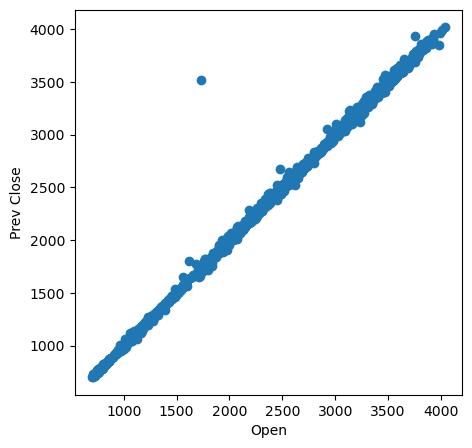

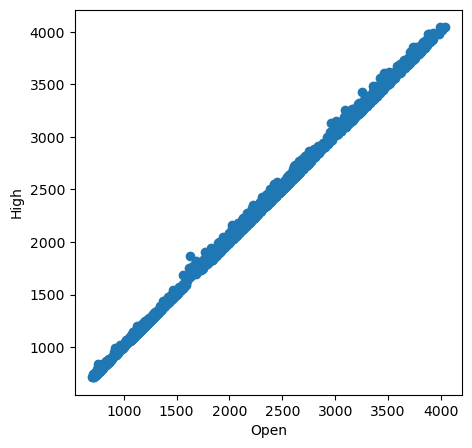

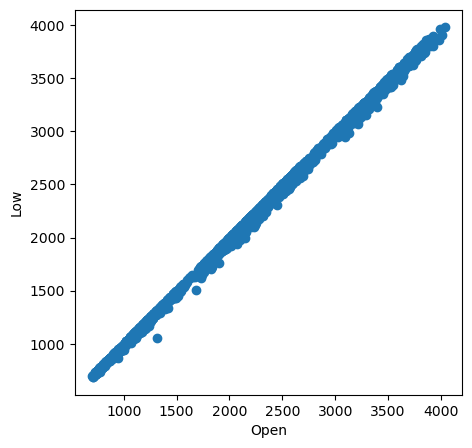

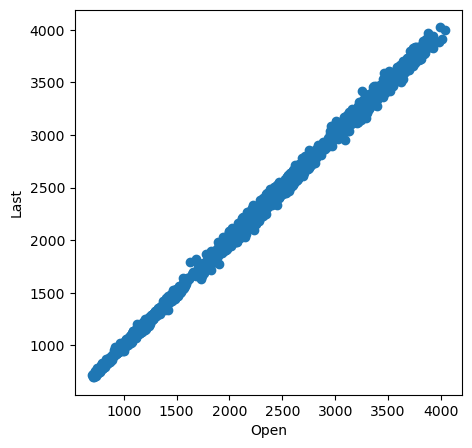

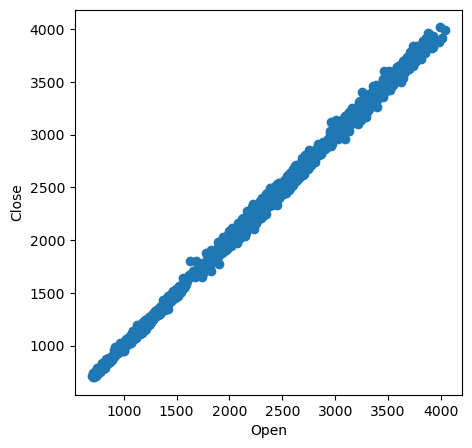

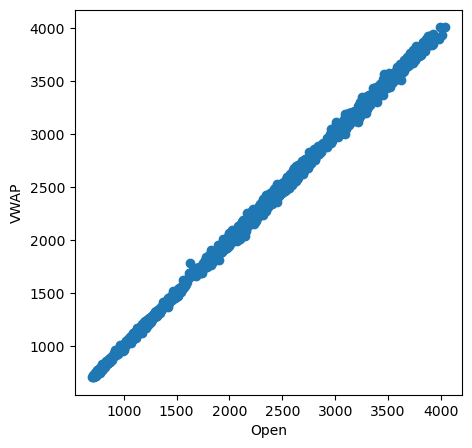

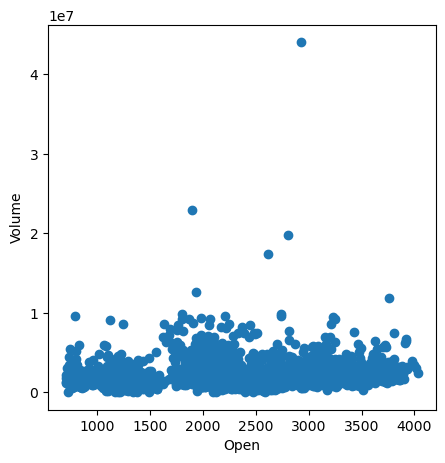

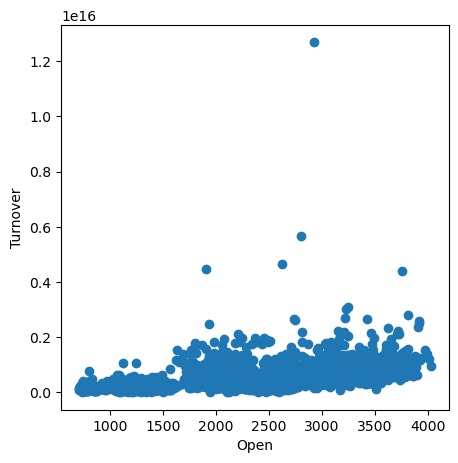

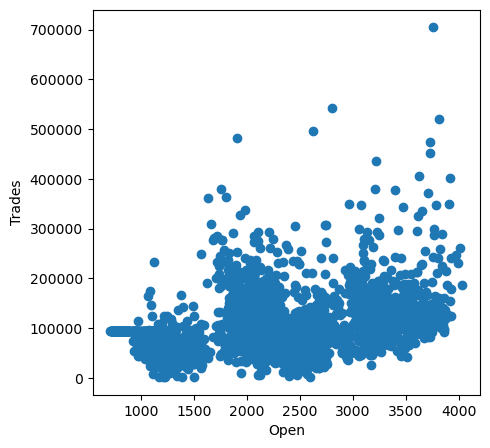

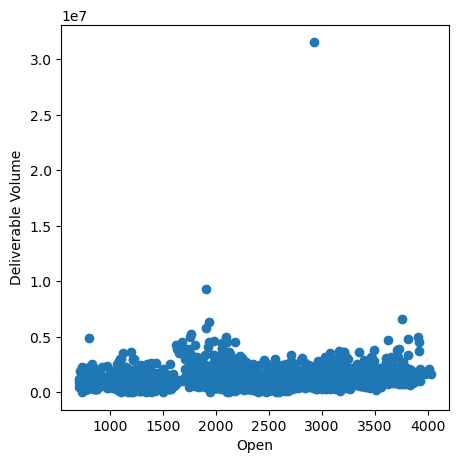

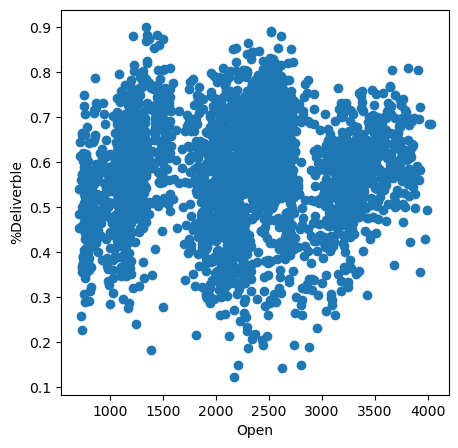

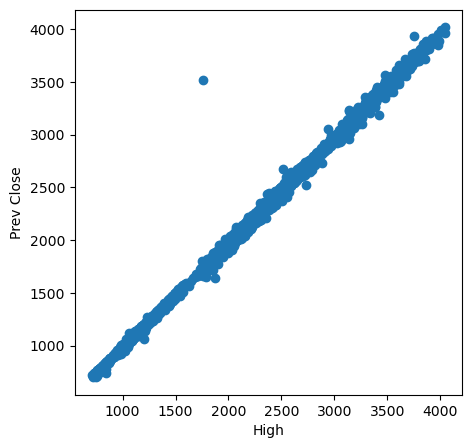

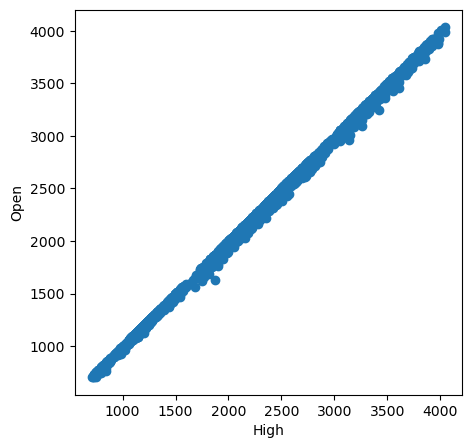

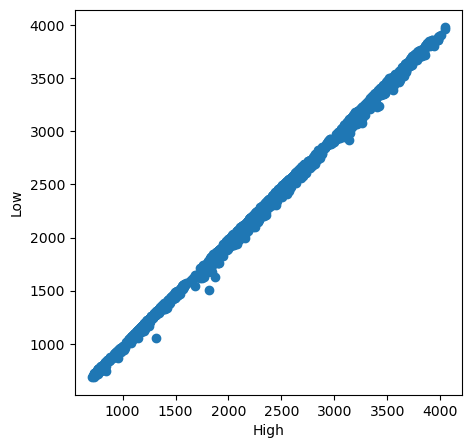

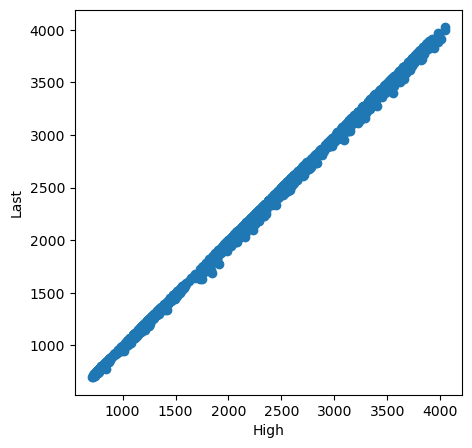

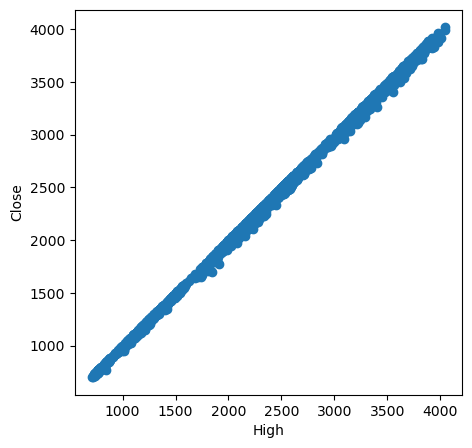

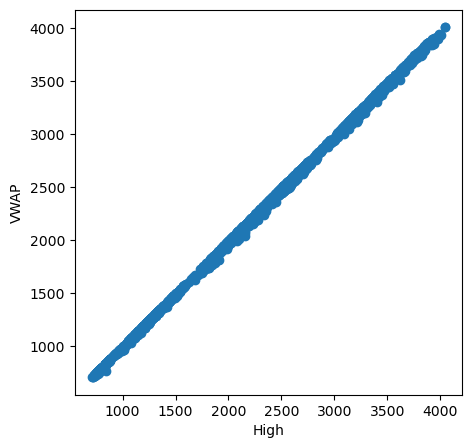

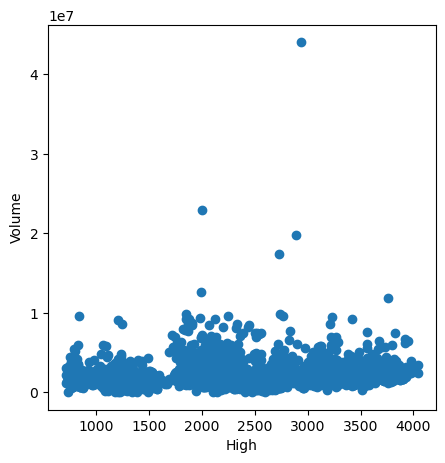

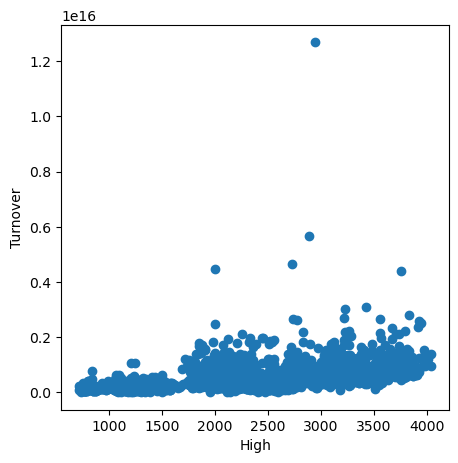

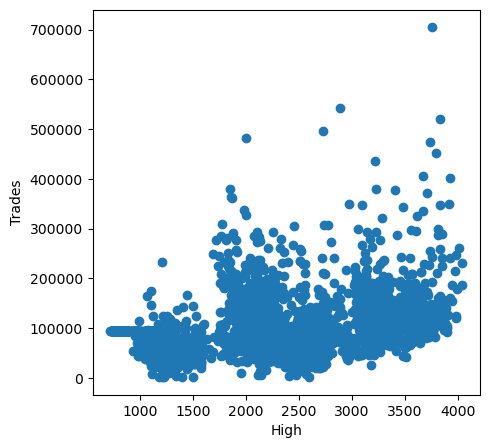

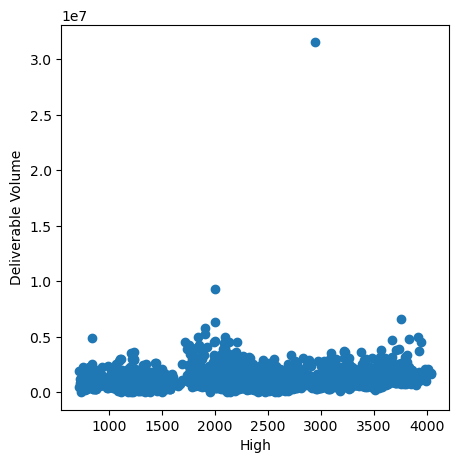

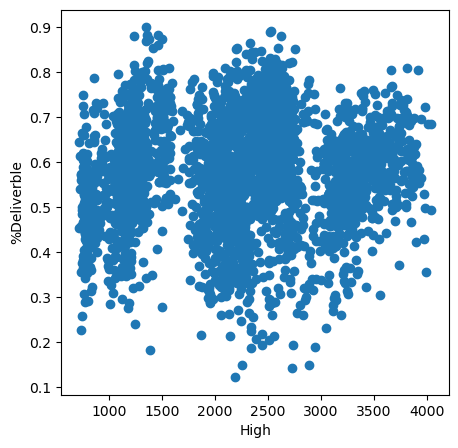

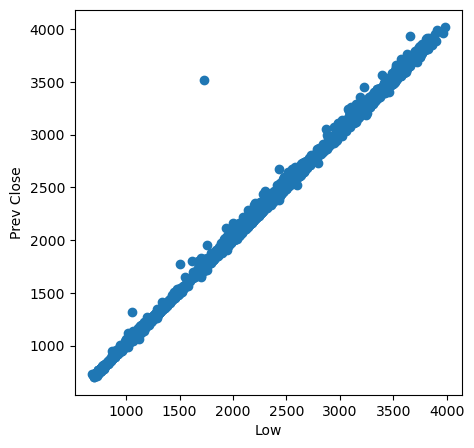

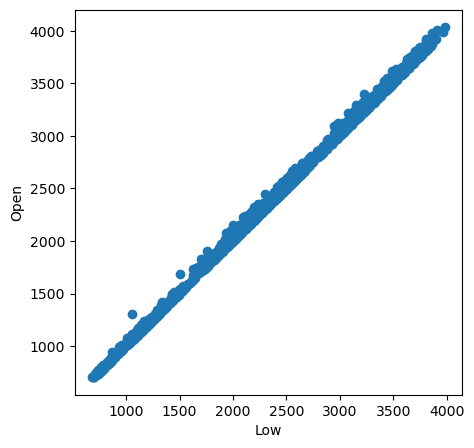

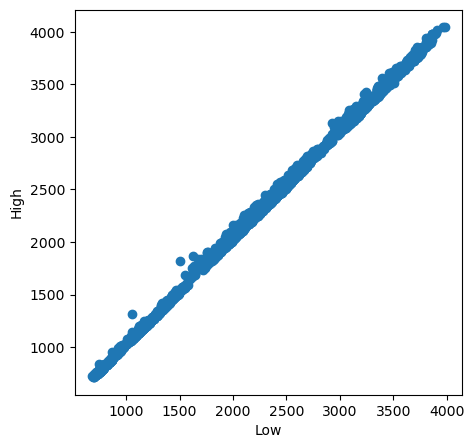

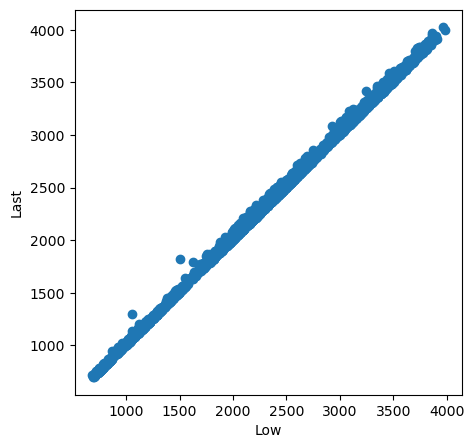

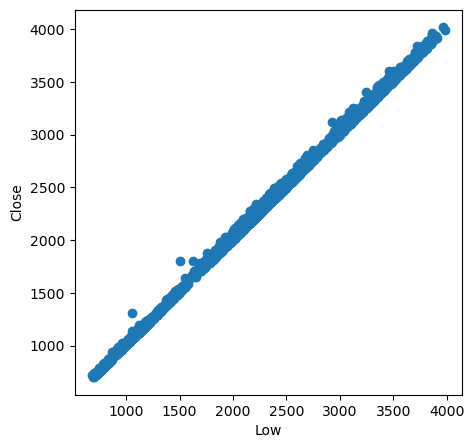

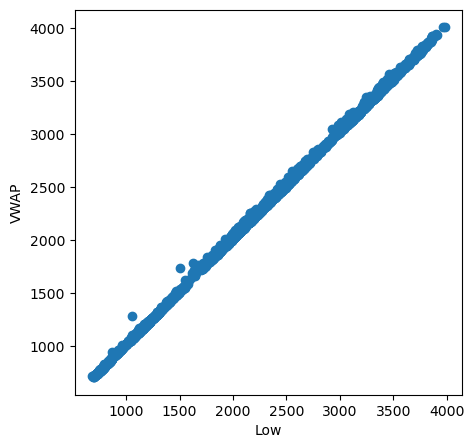

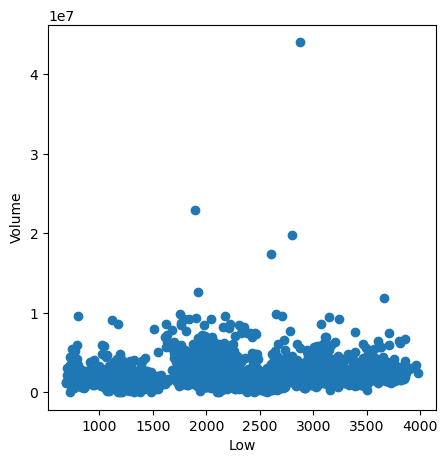

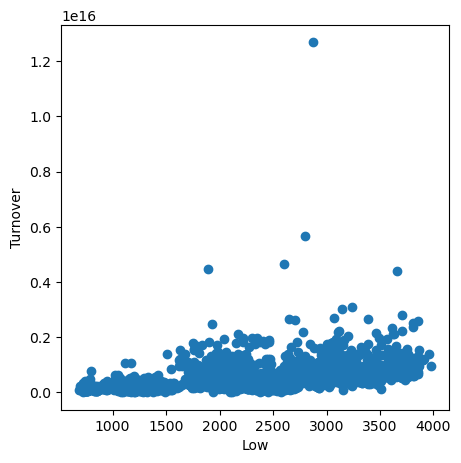

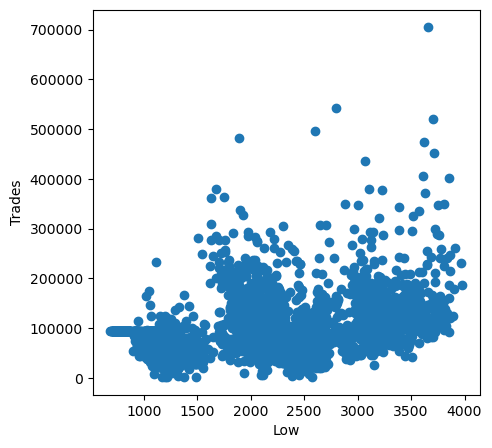

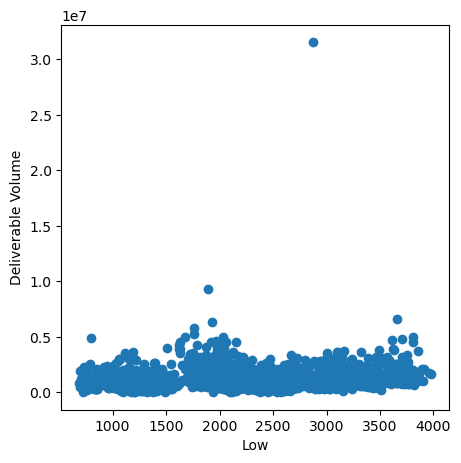

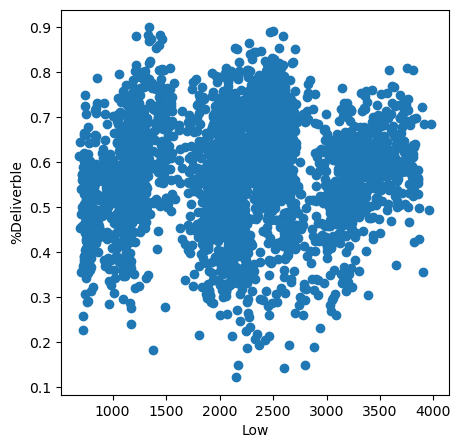

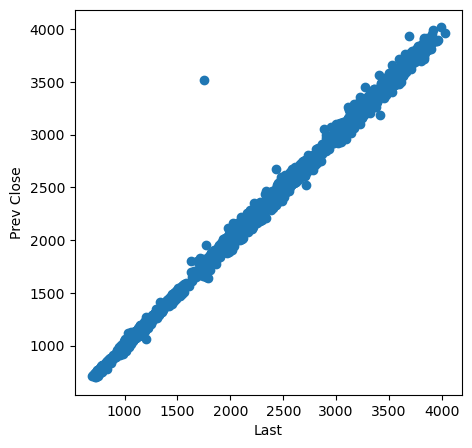

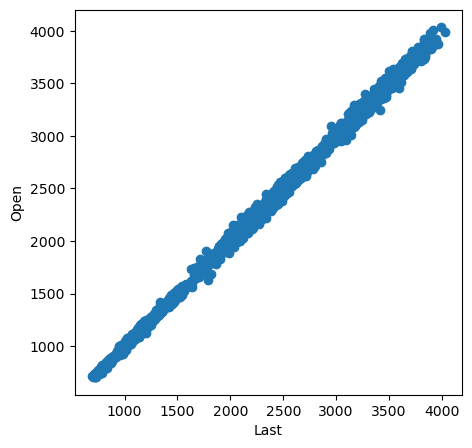

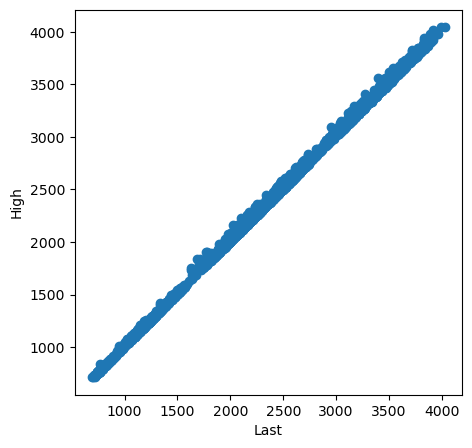

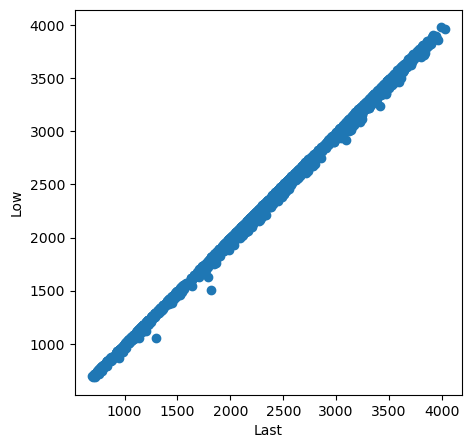

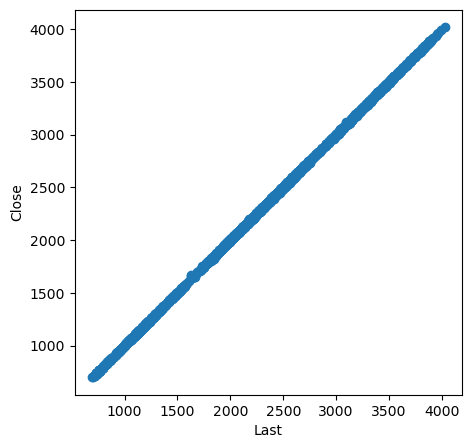

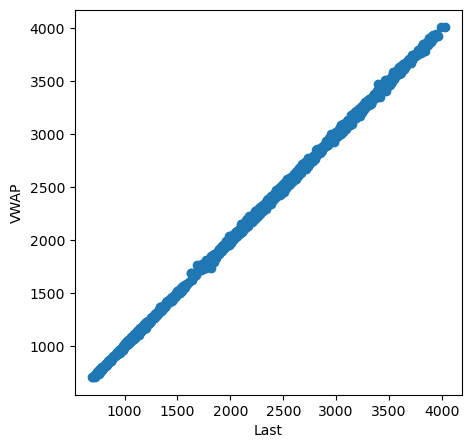

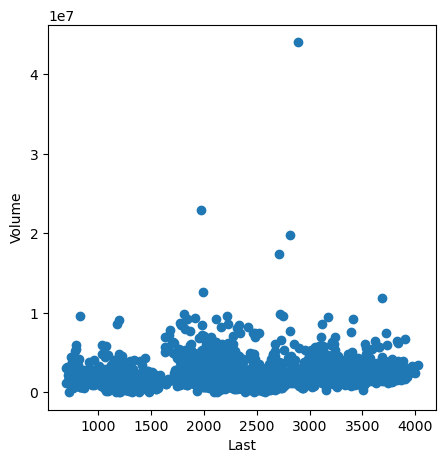

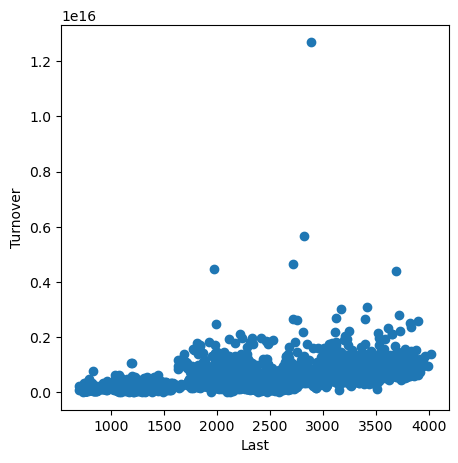

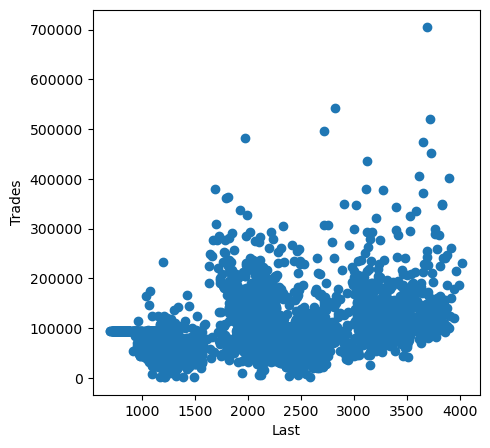

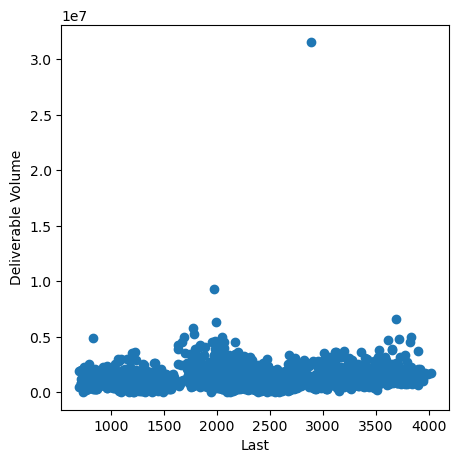

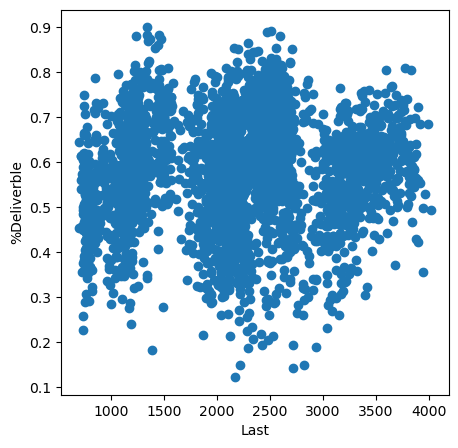

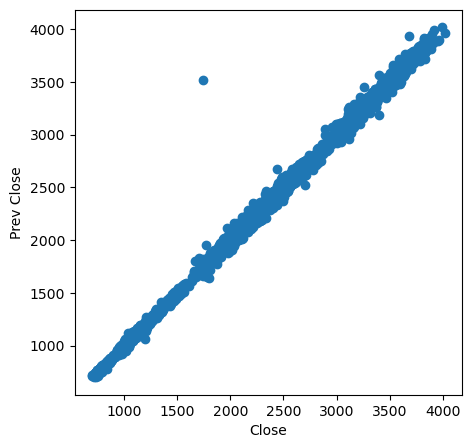

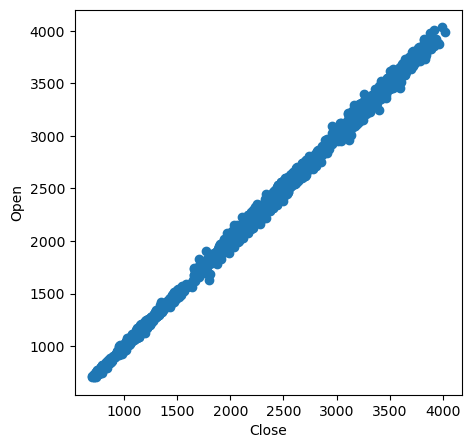

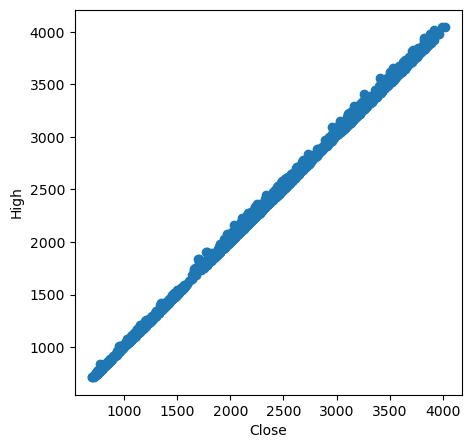

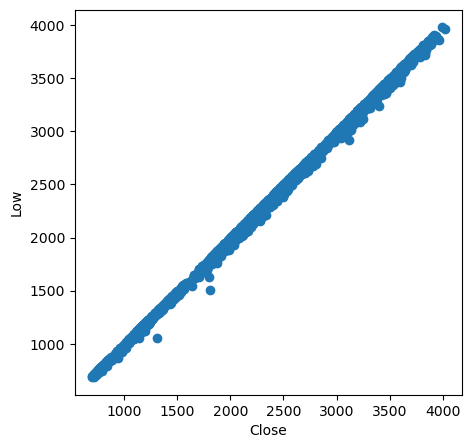

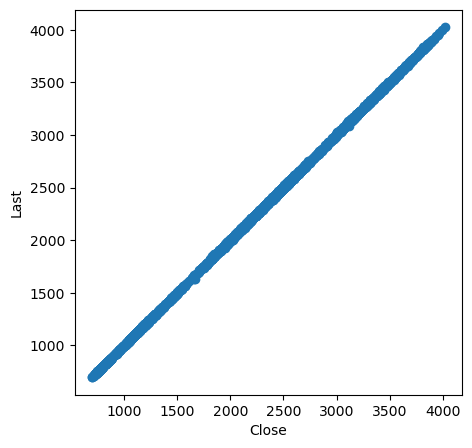

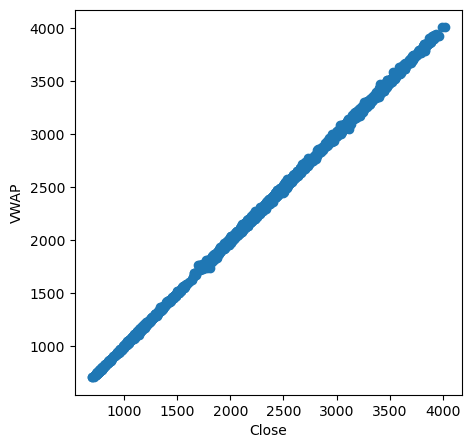

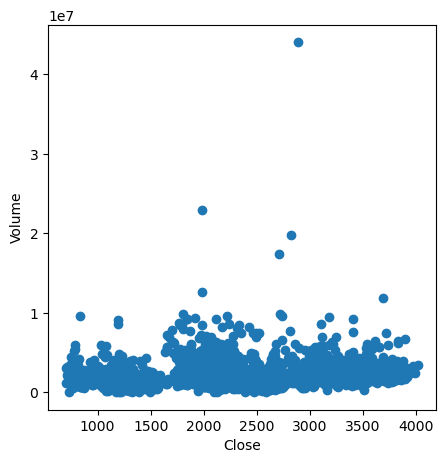

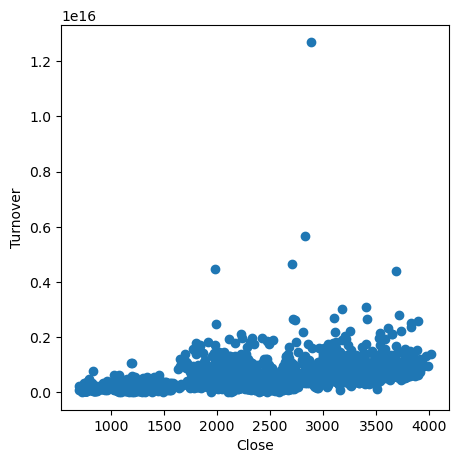

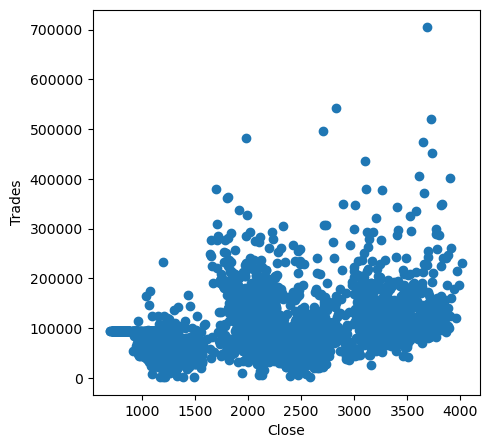

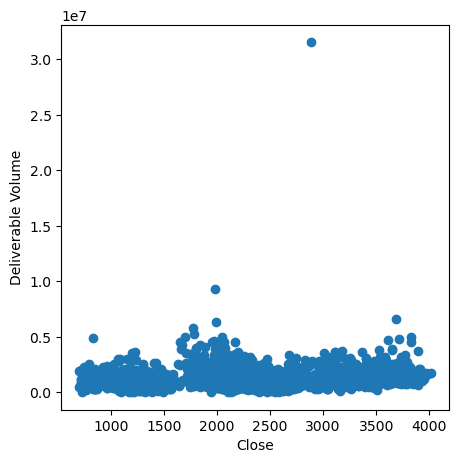

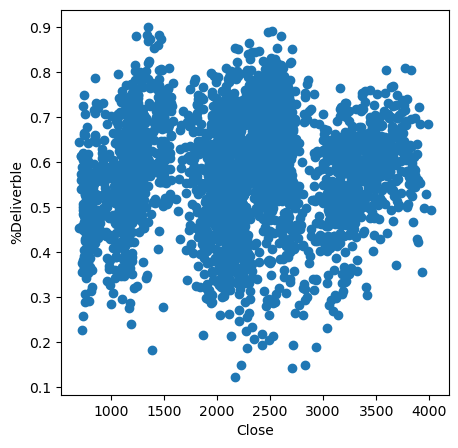

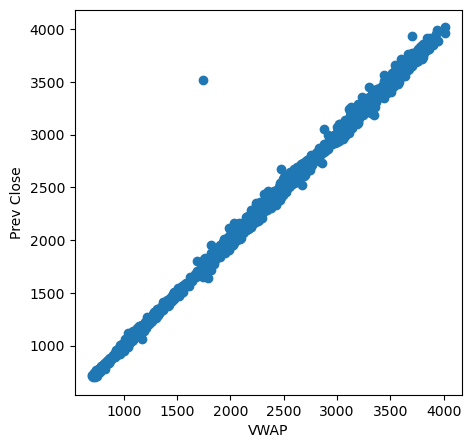

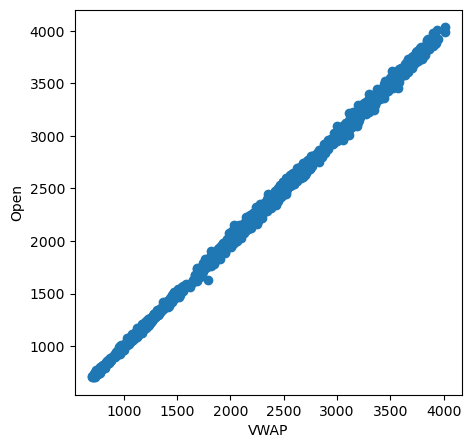

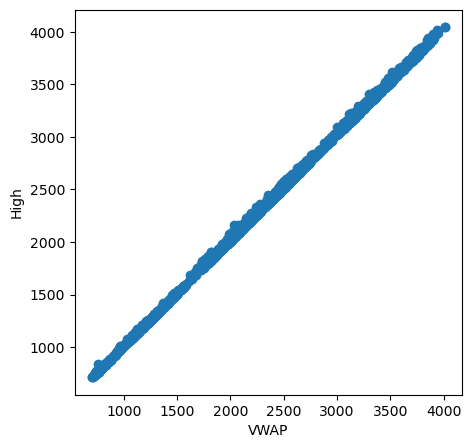

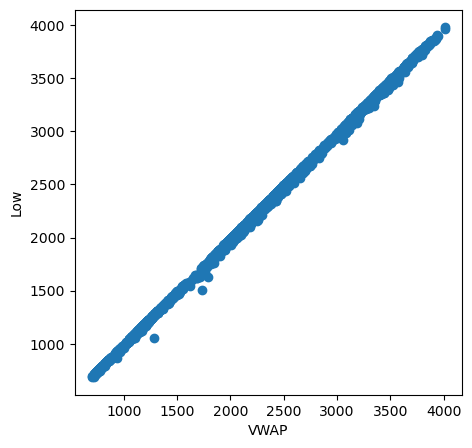

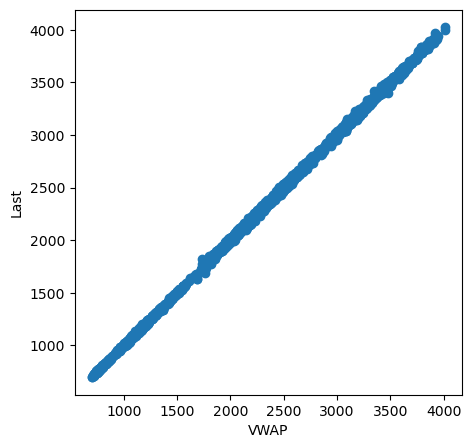

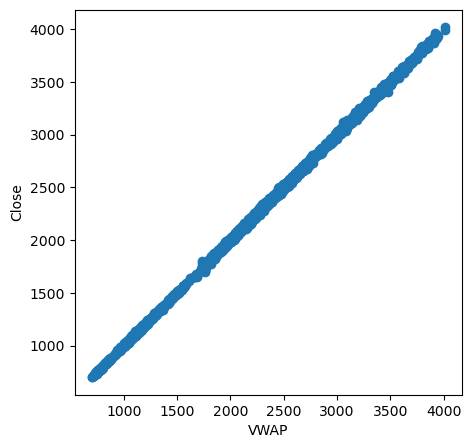

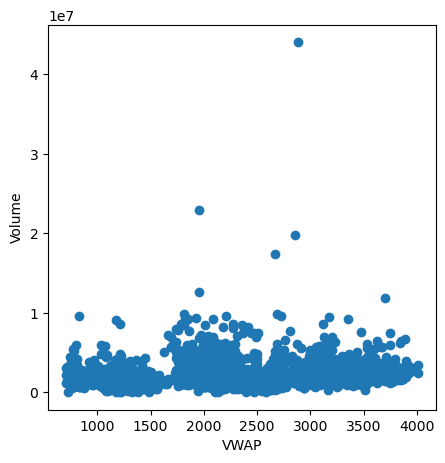

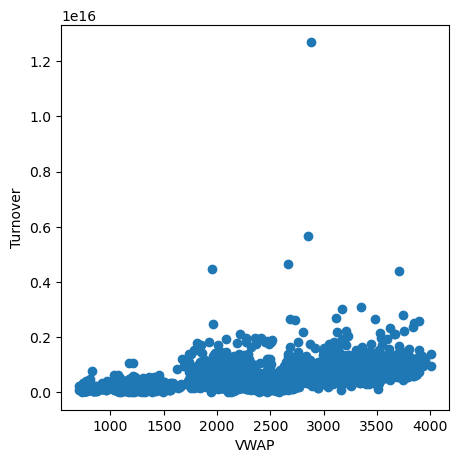

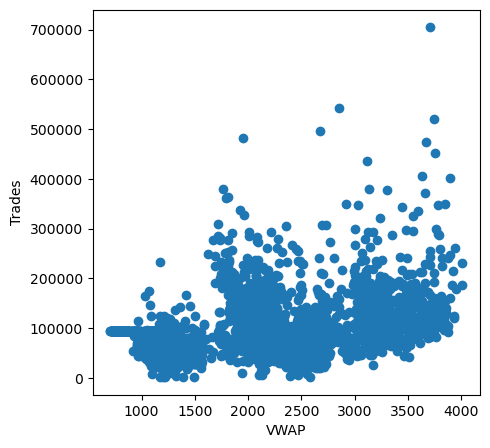

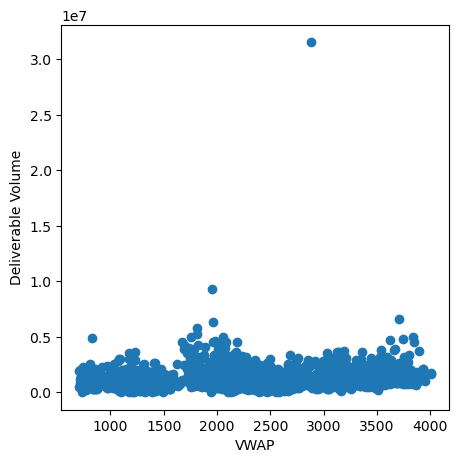

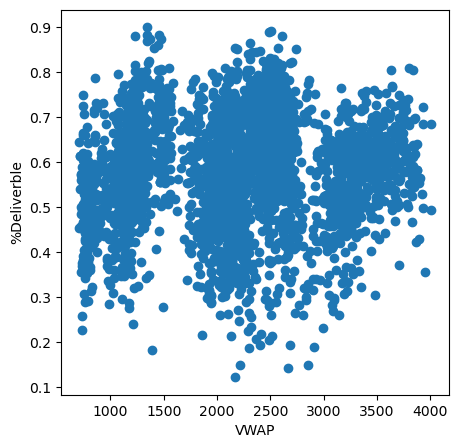

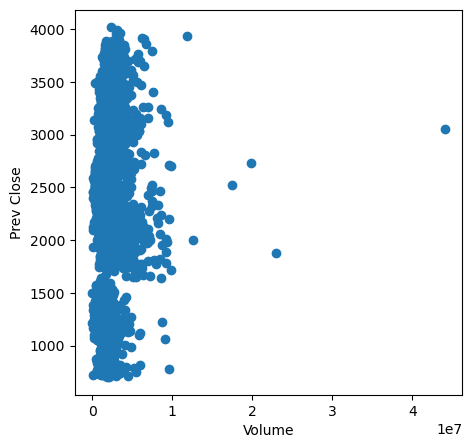

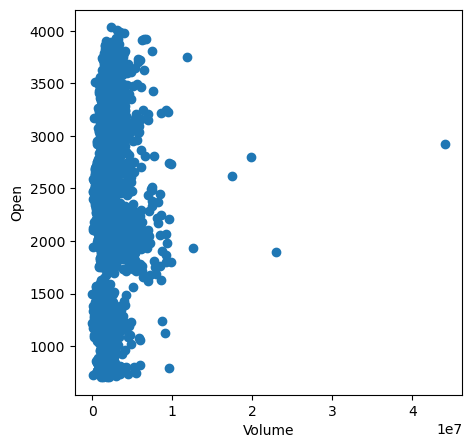

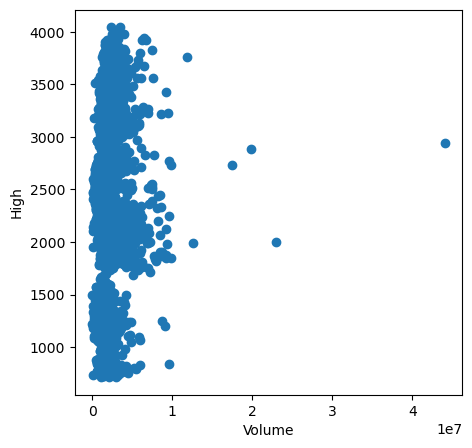

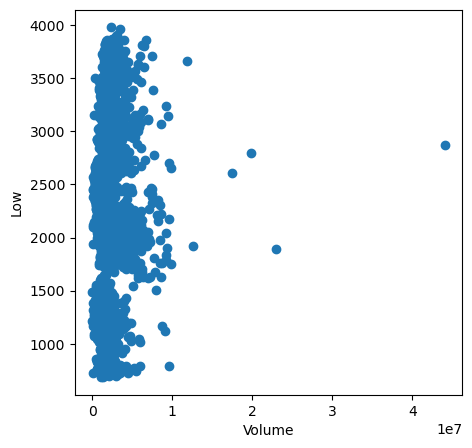

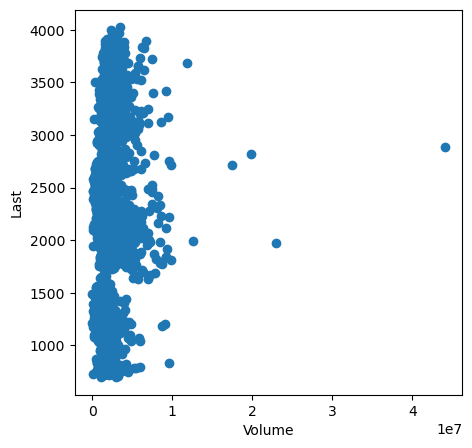

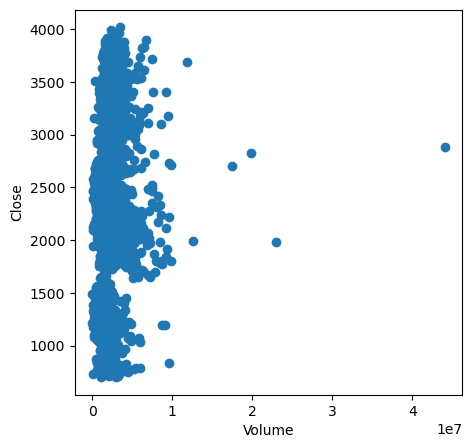

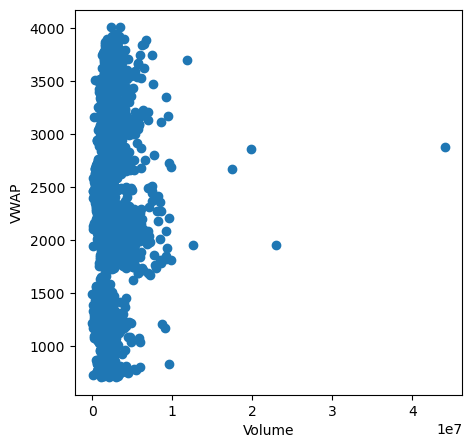

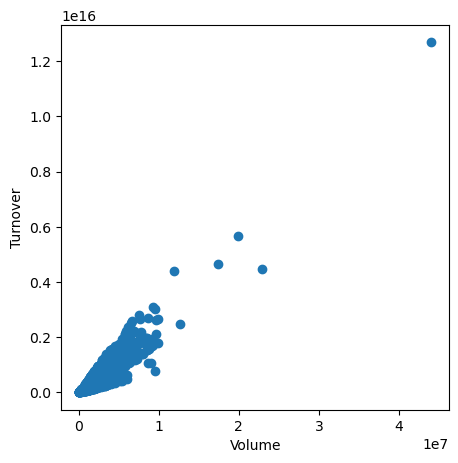

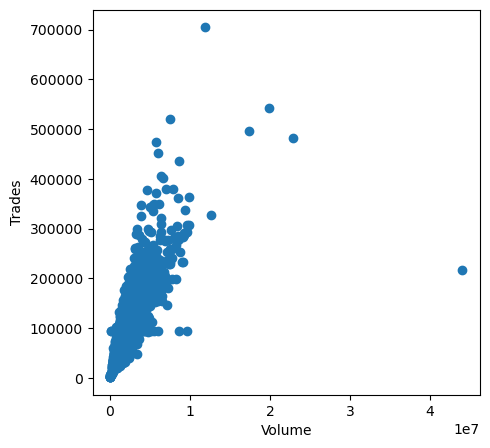

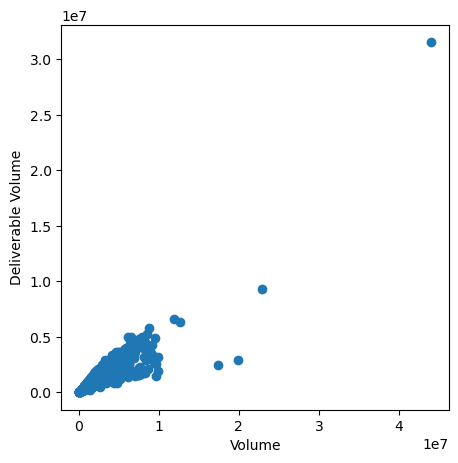

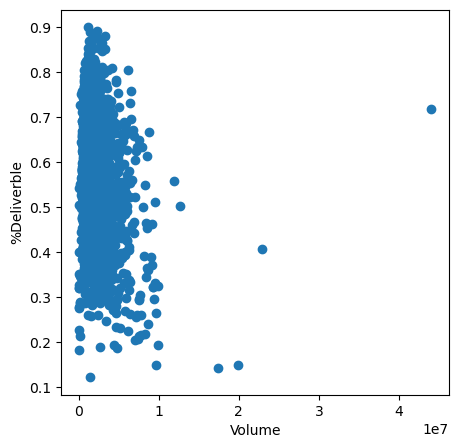

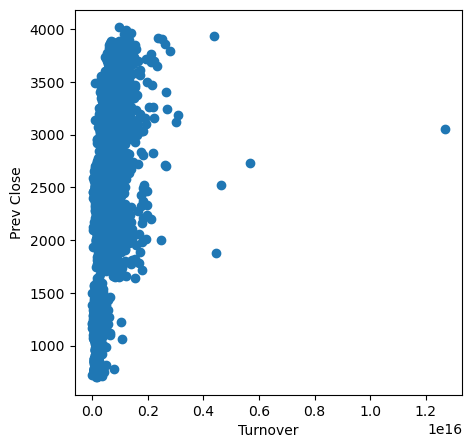

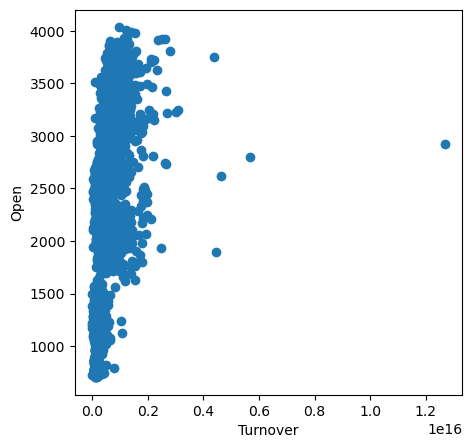

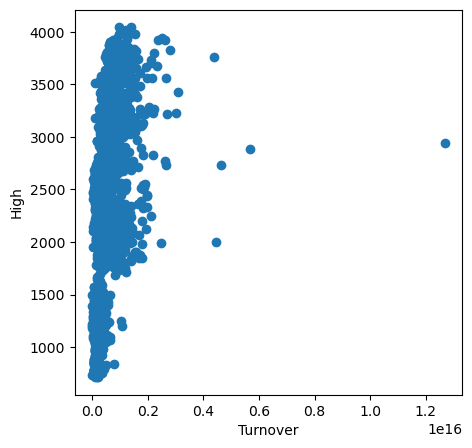

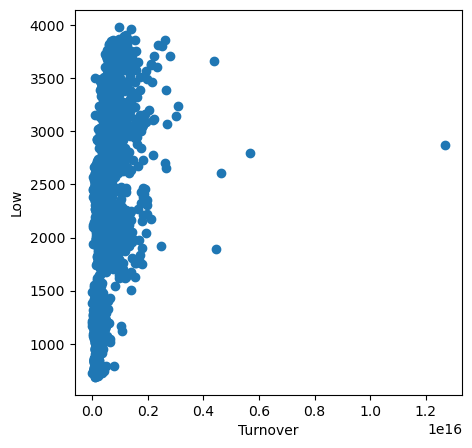

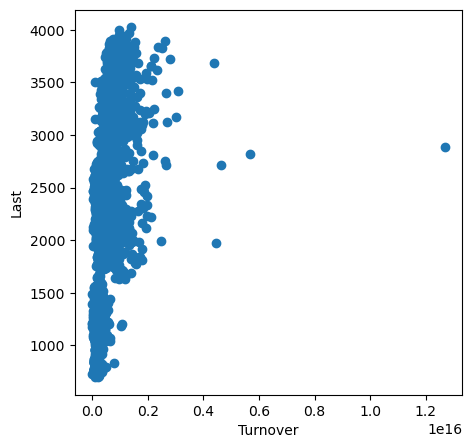

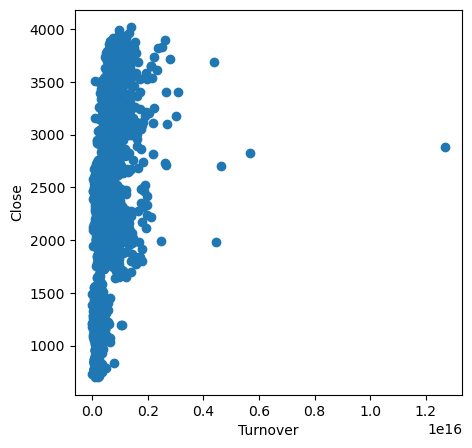

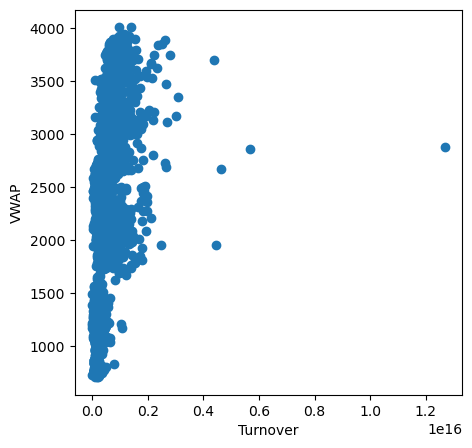

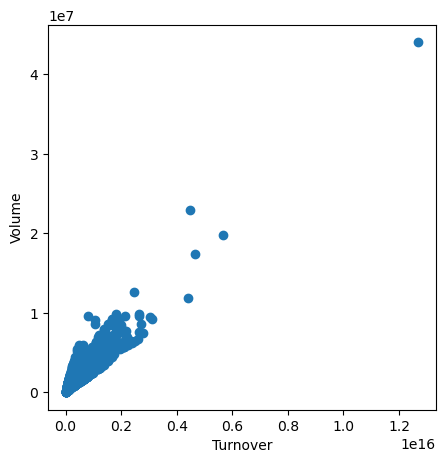

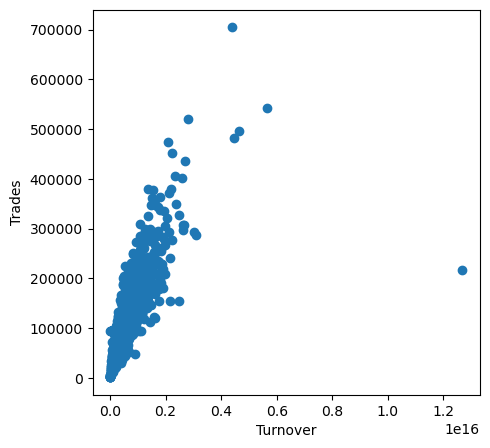

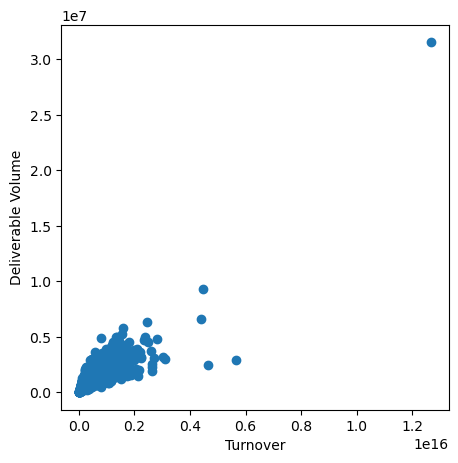

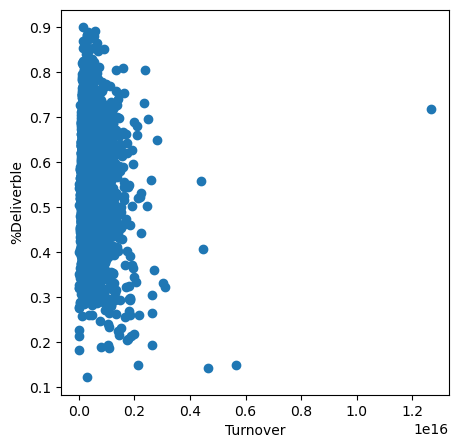

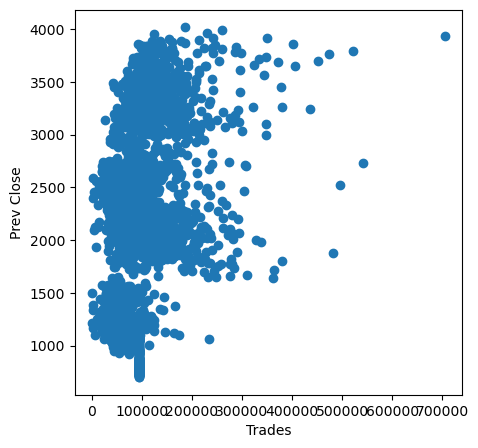

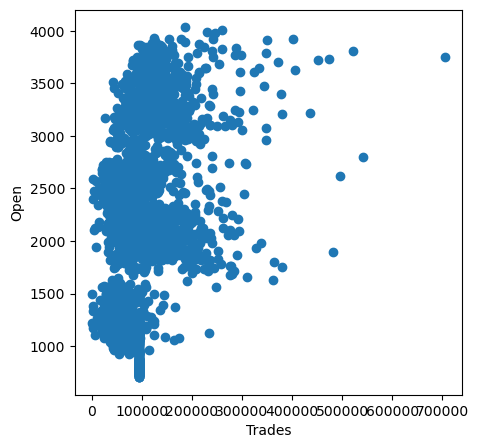

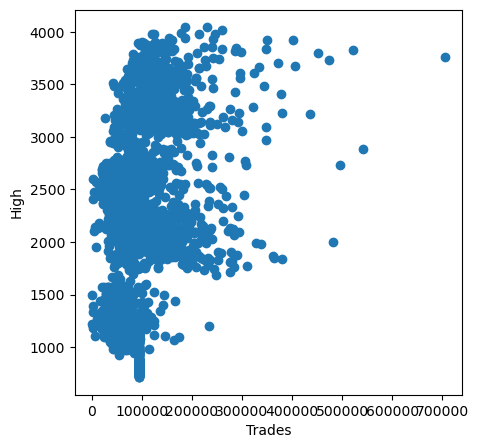

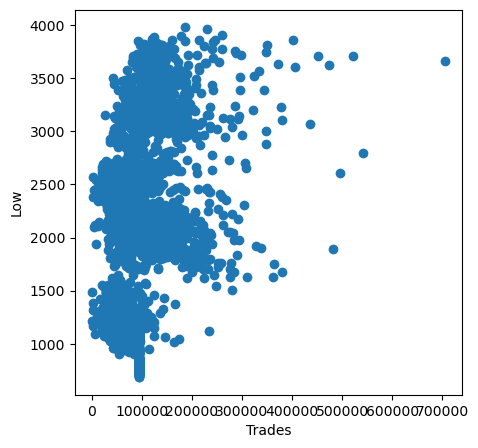

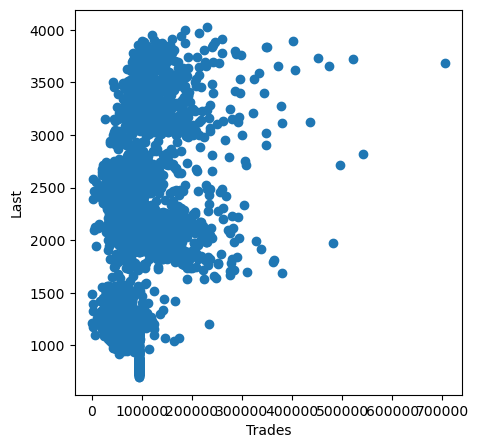

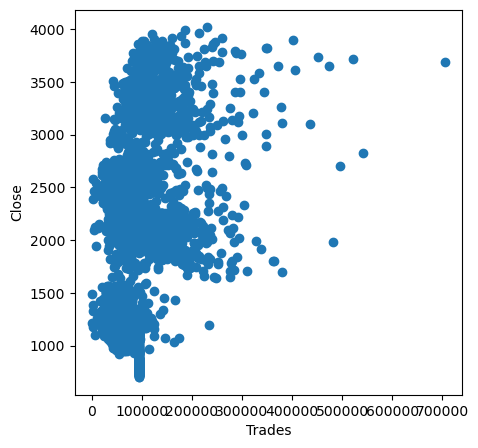

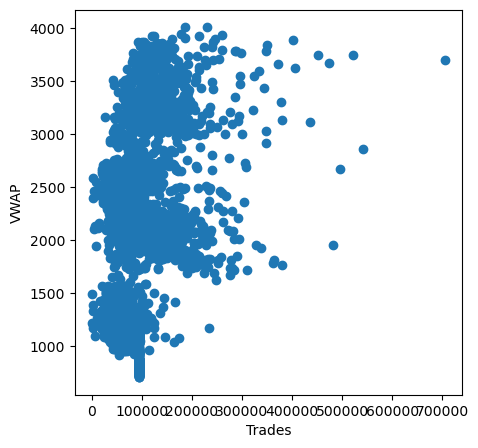

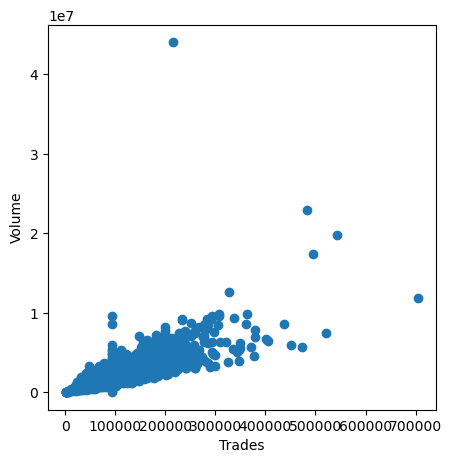

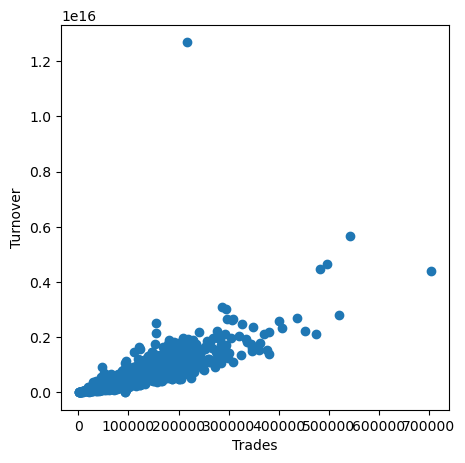

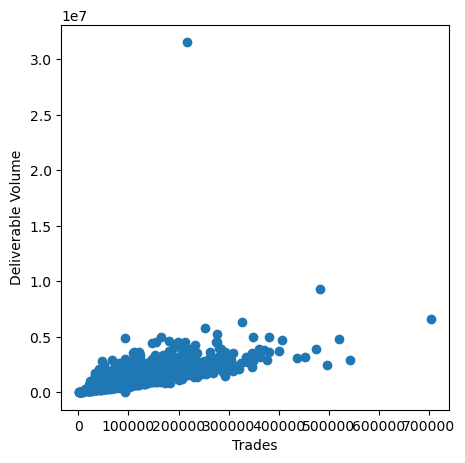

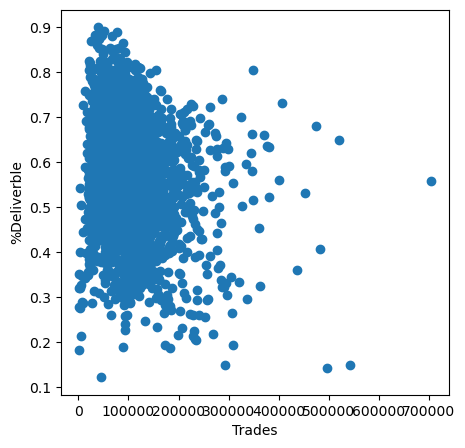

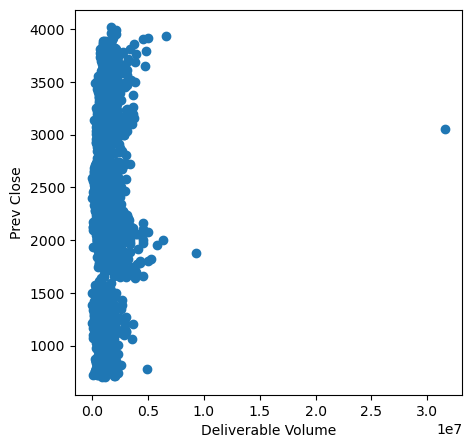

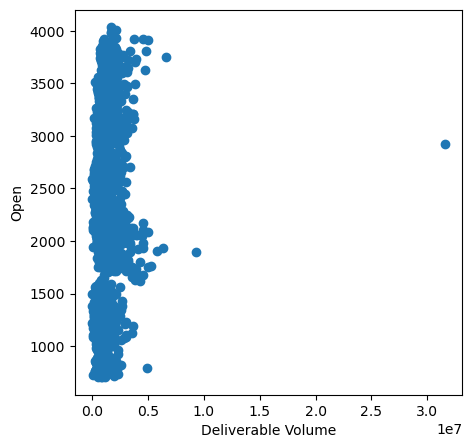

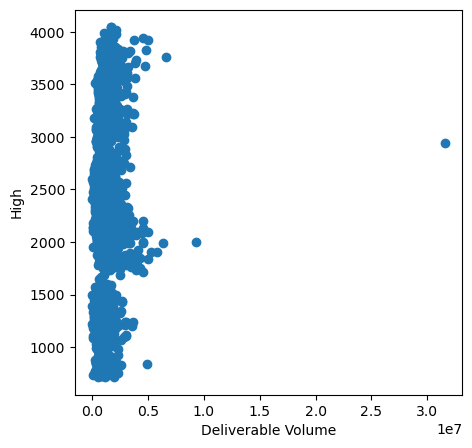

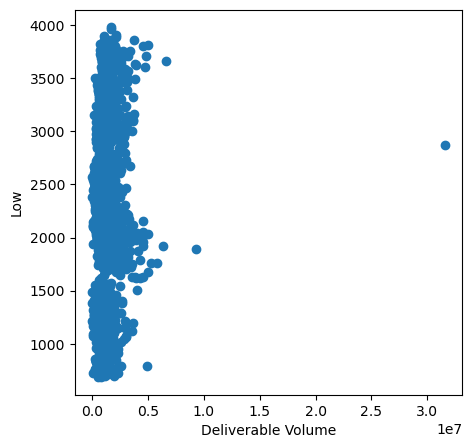

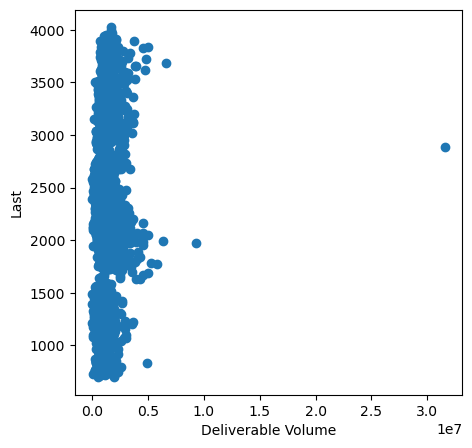

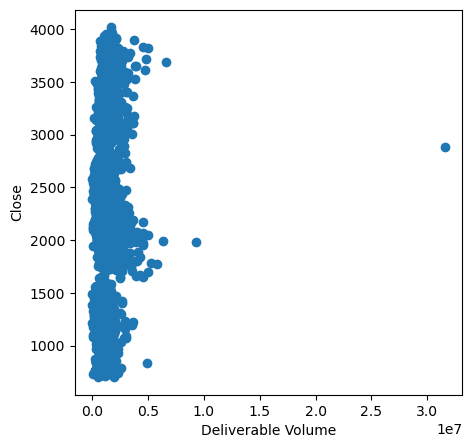

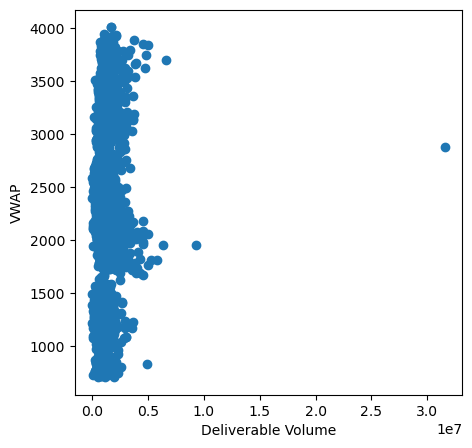

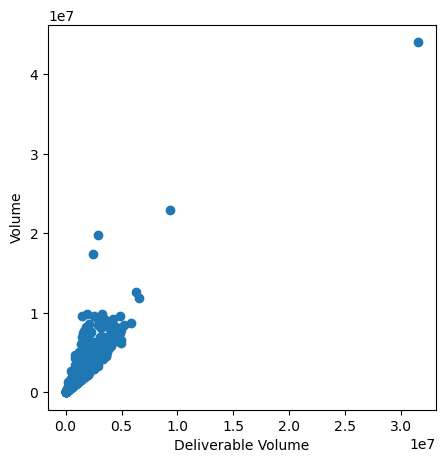

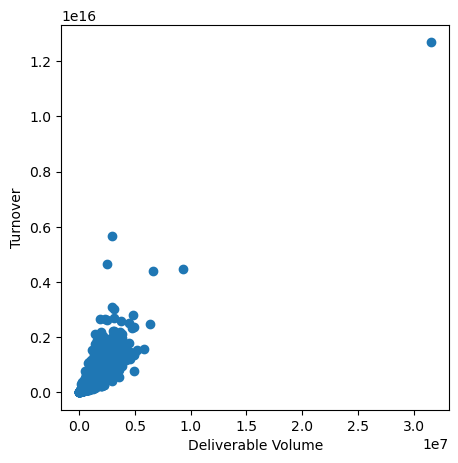

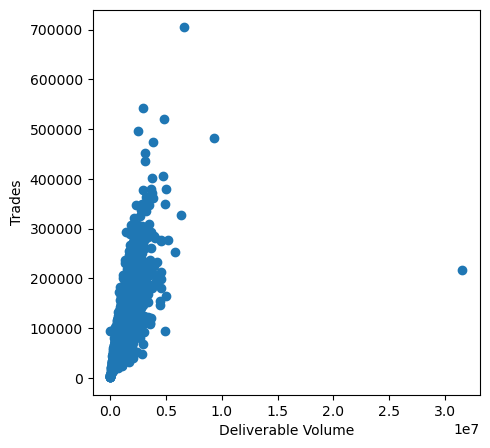

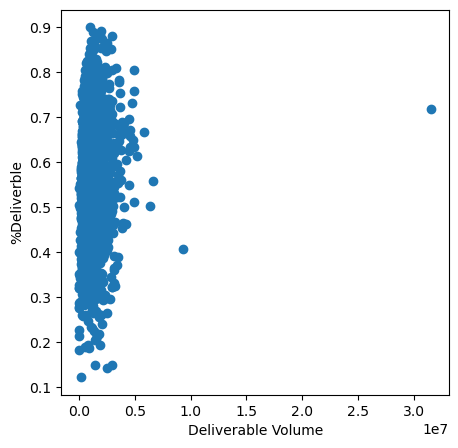

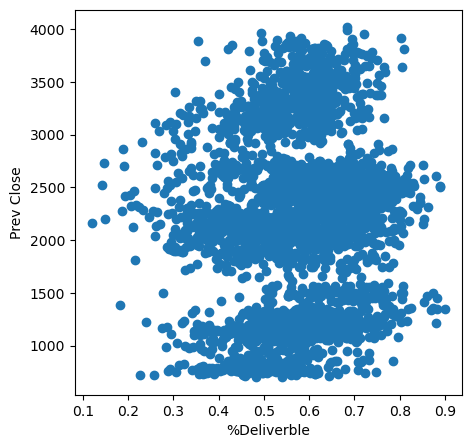

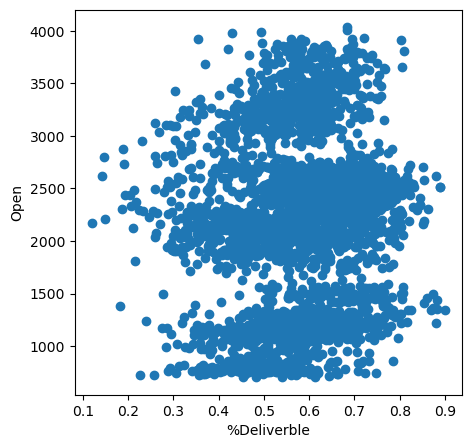

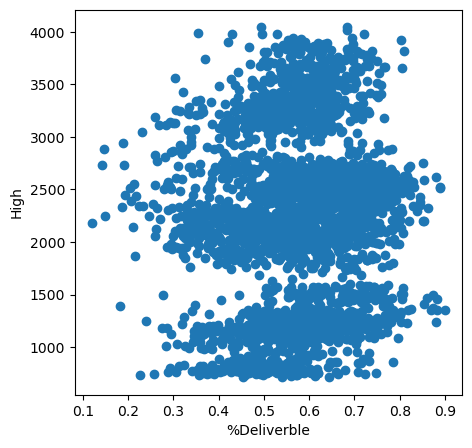

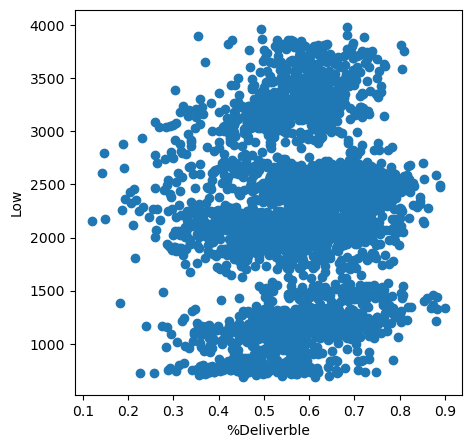

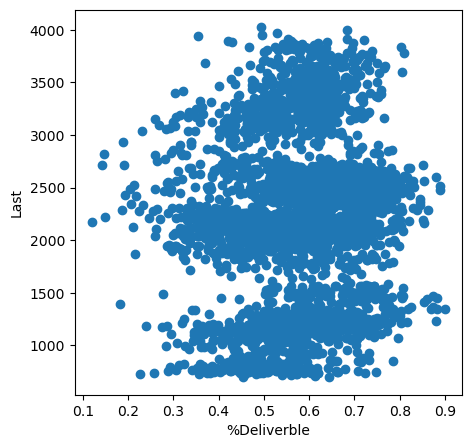

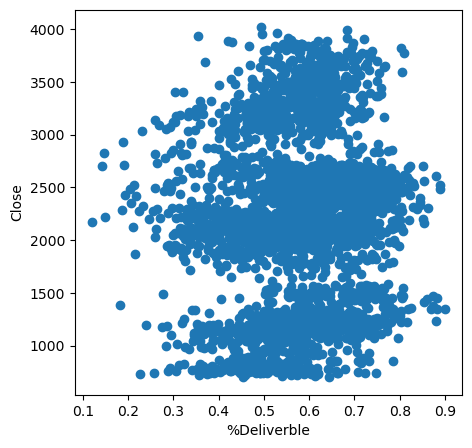

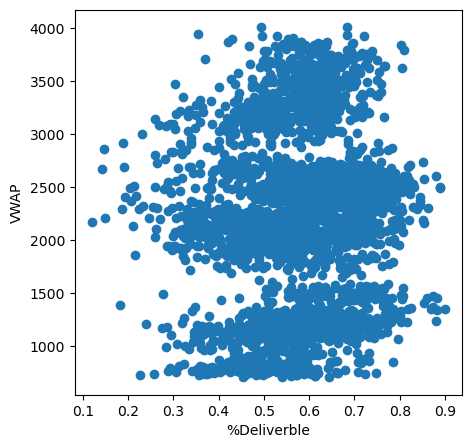

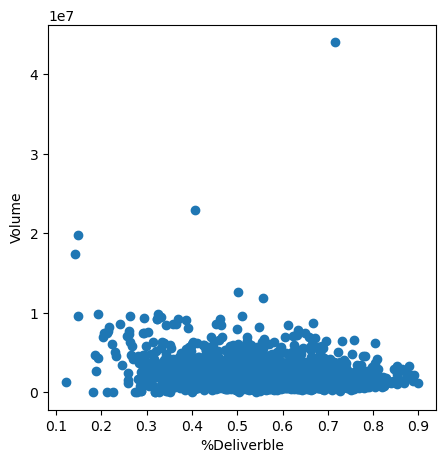

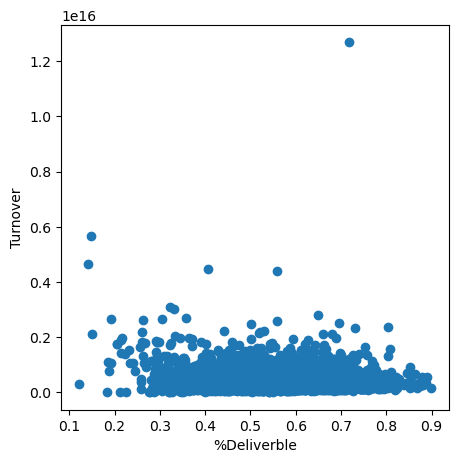

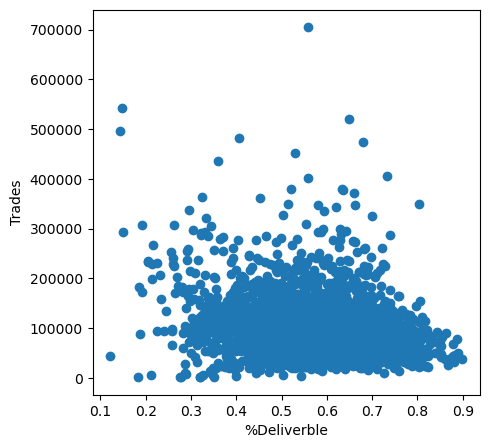

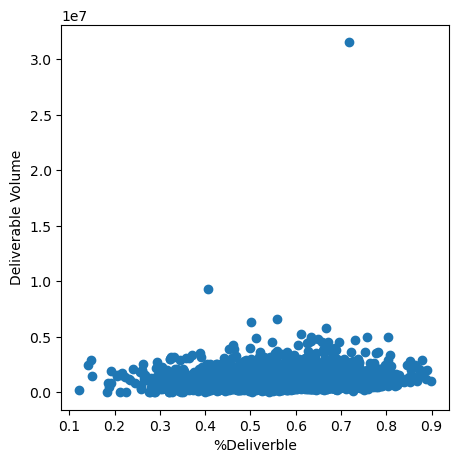

In [130]:
for i in tcs.columns:
    for j in tcs.columns:
        if i!=j:
            plt.figure(figsize=(5,5))
            plt.scatter(tcs[i],tcs[j])
            plt.xlabel(i)
            plt.ylabel(j)
            plt.show()

<AxesSubplot:>

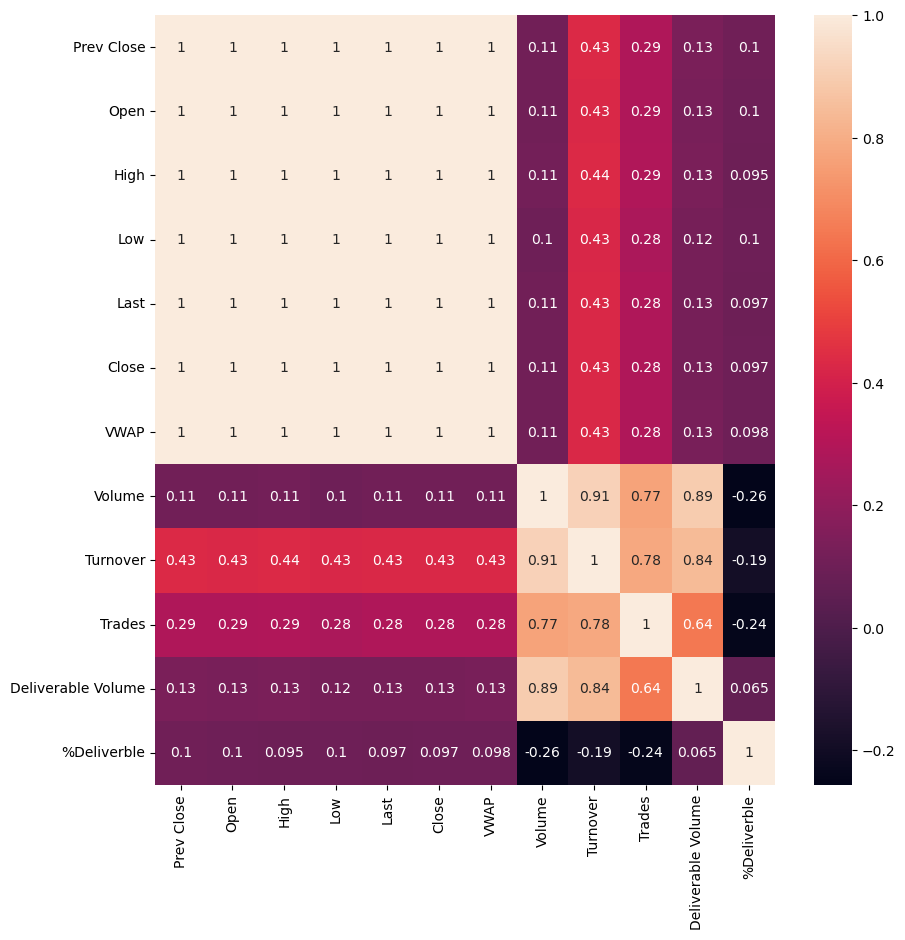

In [124]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(tcs.corr(),annot=True)

we observe from scatter plot and heat map
1.Prev Close,open,High,Low,Last,Close,VWAP is higly co related with each other.
2.Volume is highly corelated with Turnover,Deliverable Volume.
3.Trades is moderatly co related with volume,Turnover,Deliverable volume
4.Deliverable Volume is highly co related with Volume,Turnover and moderatly with Trades.
5.%Deliverable Volume is moderatly co related with Deliverable Volume

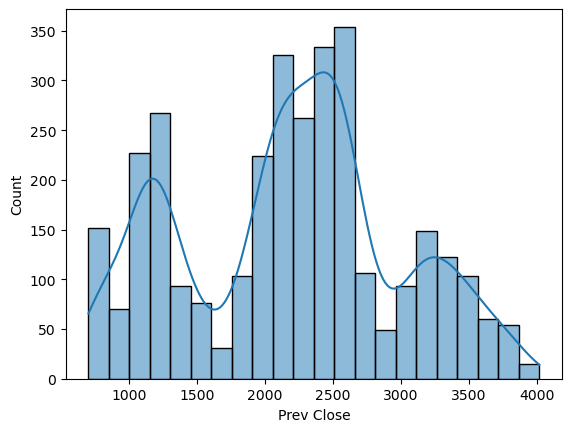

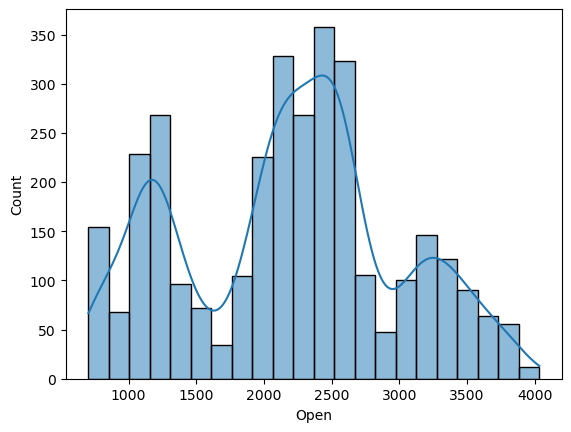

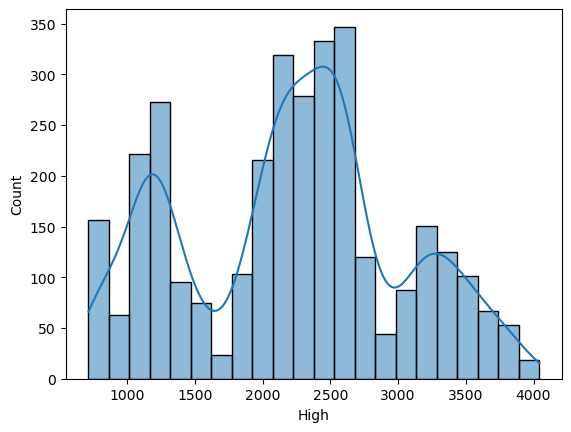

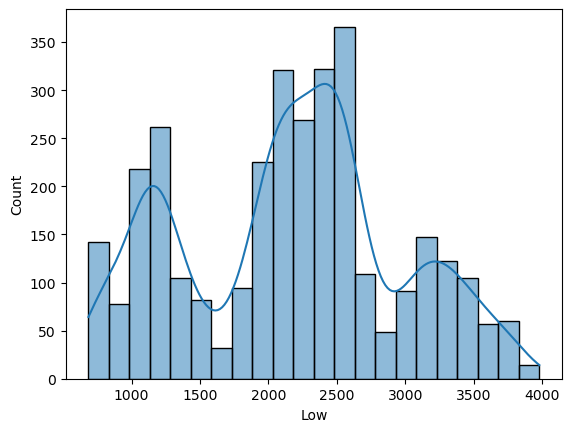

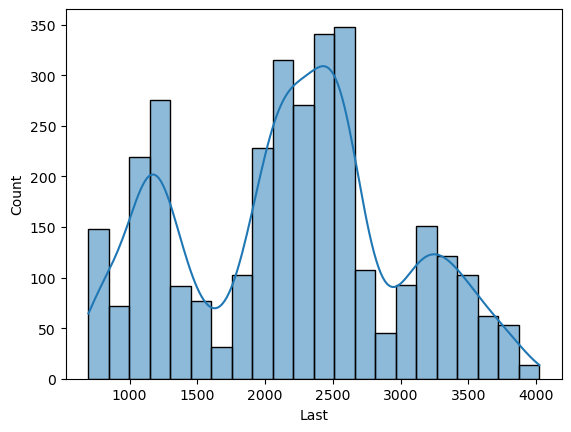

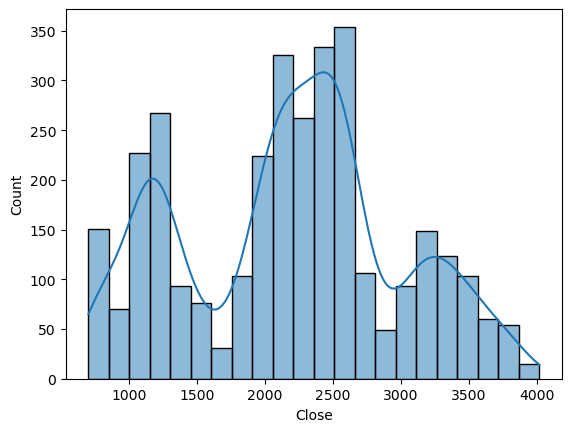

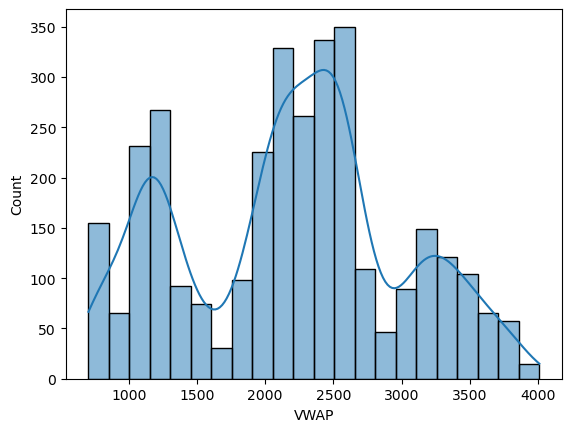

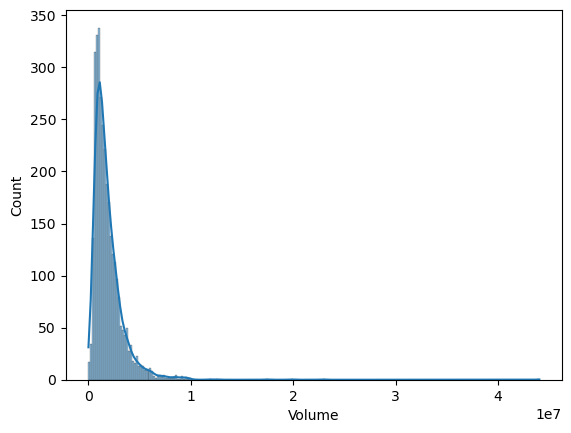

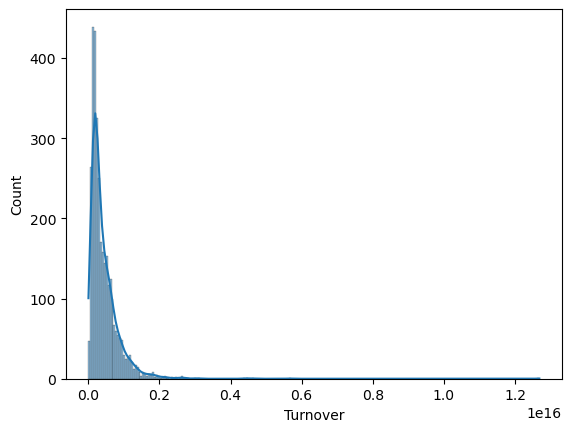

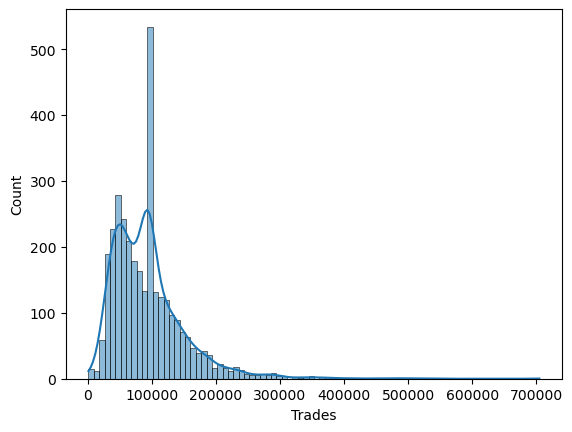

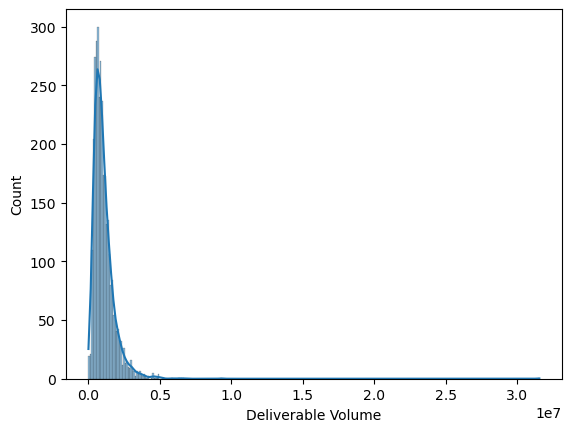

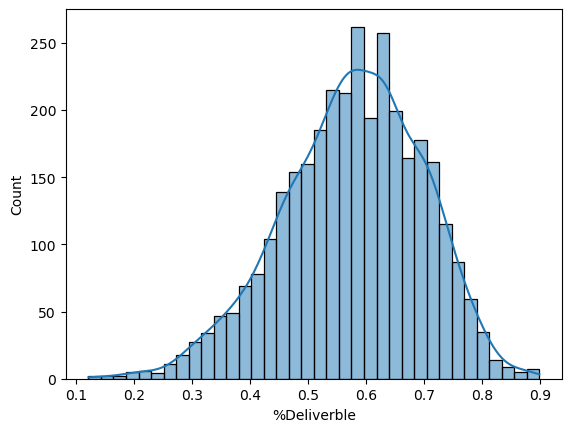

In [122]:
for i in tcs.columns:
    sns.histplot(tcs[i],kde=True)
    plt.show()

1.only count v/s %Deliverble is  almost normally distributed.

2.count v/s trades is right skewed

3.count v/s deliverable,turnover,volume data having less variance and right skewed


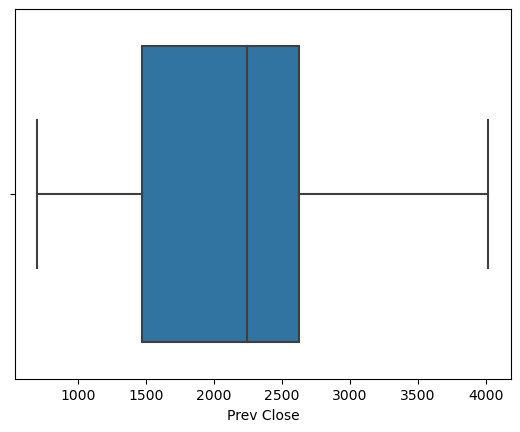

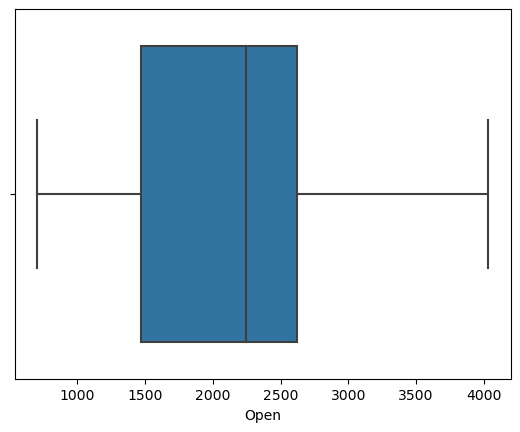

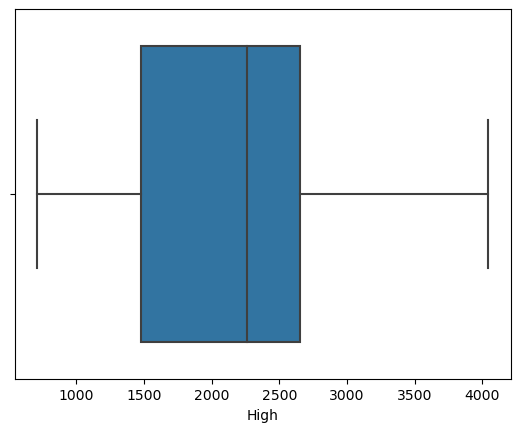

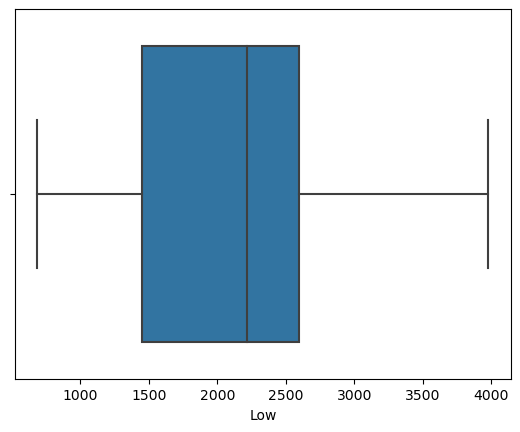

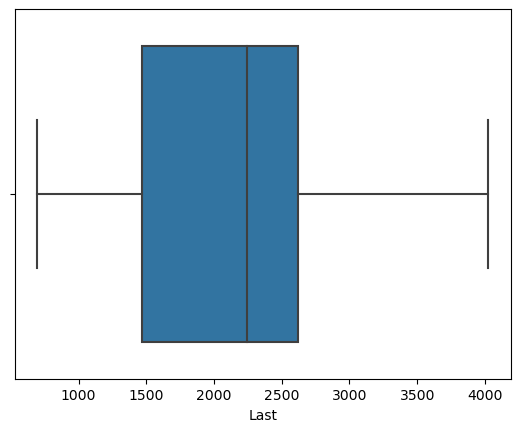

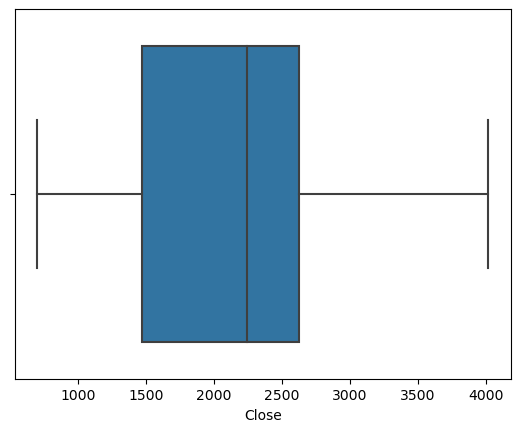

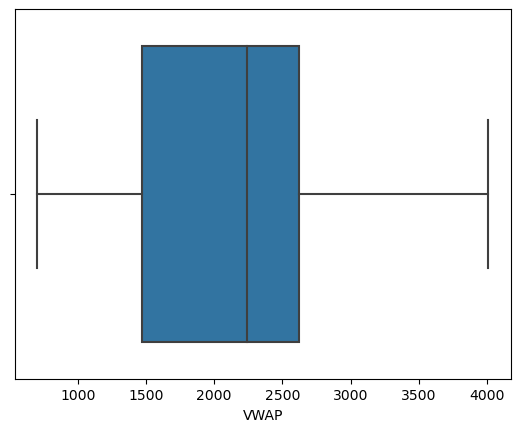

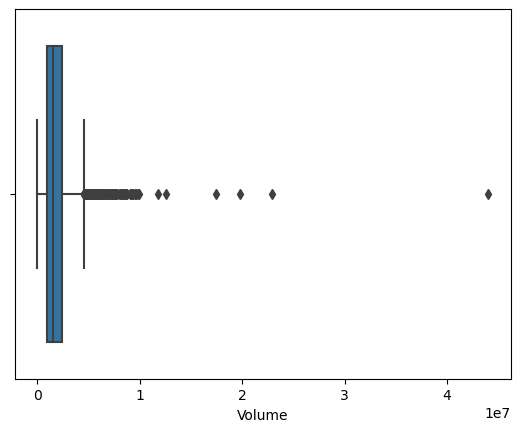

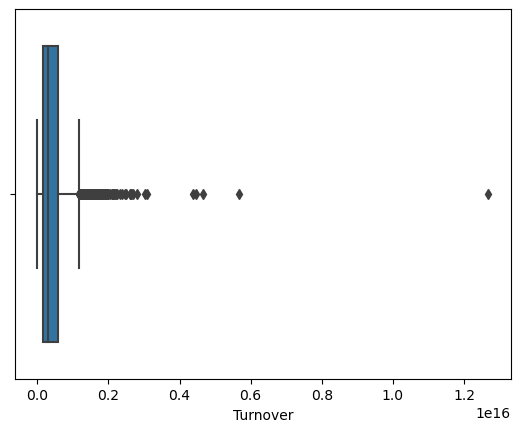

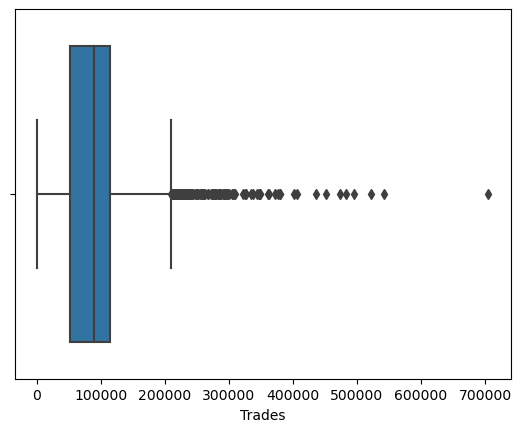

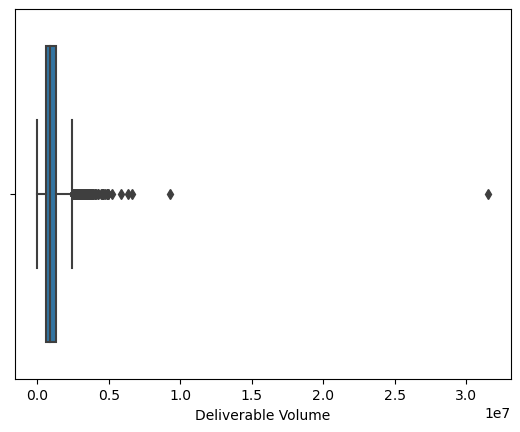

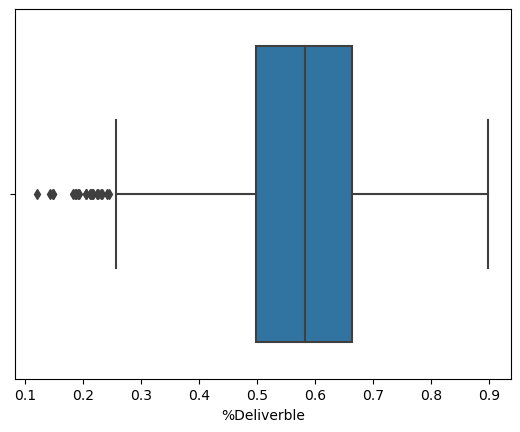

In [139]:
for i in tcs.columns:
        sns.boxplot(tcs[i])
        plt.xlabel(i)
        plt.show()

1.There are no outliers in Prev Close ,open,High,Low,Last,Close,VWAP.
2.Rest all there is outliers